![nsduh.jpg](attachment:nsduh.jpg)

# Creating a Drug User Profile

## Introduction

In this project we are working with the National Survey on Drug Use and Health(NSDUH) from 2002-2014. The survey on average polls 55,600 people per year asking questions about their drug use or non-use, mental health, treatment received, education, age, etc.
The survey's participants' adresses and contact information is separated from the dataset. All the participants are at least 12 years of age. The survey is conducted by the United States federal government. The data is free to download off the Inter-university Consortium for Political and Social Research(ICPSR) website. https://www.icpsr.umich.edu/web/pages/ICPSR/index.html

There is a wealth of data collected about various drugs and their derivatives in this survey. For the scope of this project we are only interested in cigarettes, alcohol, crack, heroin and cocaine. These are five drugs that the general public is familiar with and therefore might gain insight into how they are personally affected.

We have a simple question for this project. Can we build a profile of a person who is more likely than others to be a habitual user of cigarettes or alcohol? Can we build a profile of a person who is more likely than others to try crack, heroin or cocaine? There was simply not enough cases of people admitting that they were habitual users of crack, cocaine and heroin. For reference only 22 people out of 55,000+ claimed themselves as habitual users of crack for the 2011 survey. Then can we build a machine learning model that can accurately predict given a certain profile, whether the person is a habitual user of alcohol and cigarettes or has tried hard drugs or not?

## Importing packages and reading in data

In [360]:
#Importing necessary packages for analysis
import sys
import os
os.chdir('C:\\Users\\wally')
import scipy
import sklearn
import scikitplot as skplt
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import random
import math
import re
from dython.nominal import associations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score, log_loss,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib import lines as plt_lines
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
os.chdir('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts')

There were 13 files to read in. Each file represents a survey from a different year. All surveys were conducted in a similar way. I chose all the surveys from the National Survey on Drug Use and Health series. The survey continues to be conducted by the United States federal government. Prior to 2002 it was called the National Household Survey on Drug Abuse. Due to memory limitations and the availibility of data on the ICPSR website, I chose to stop at and include the data for 2014.

In [361]:
# Read in drug survey dataframes
drugs_2014 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2014\\ICPSR_36361\\DS0001\\36361-0001-Data.tsv",sep='\t')
drugs_2013 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2013\\ICPSR_35509\\DS0001\\35509-0001-Data.tsv",sep='\t')
drugs_2012 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2012\\ICPSR_34933\\DS0001\\34933-0001-Data.tsv",sep='\t')
drugs_2011 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2011\\ICPSR_34481\\DS0001\\34481-0001-Data.tsv",sep = '\t')
drugs_2010 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2010\\ICPSR_32722\\DS0001\\32722-0001-Data.tsv", sep = '\t')
drugs_2009 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2009\\ICPSR_29621\\DS0001\\29621-0001-Data.tsv", sep = '\t')
drugs_2008 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2008\\ICPSR_26701\\DS0001\\26701-0001-Data.tsv", sep = '\t')
drugs_2007 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2007\\ICPSR_23782\\DS0001\\23782-0001-Data.tsv", sep = '\t')
drugs_2006 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2006\\ICPSR_21240\\DS0001\\21240-0001-Data.tsv", sep = '\t')
drugs_2005 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2005\\ICPSR_04596\\DS0001\\04596-0001-Data.tsv", sep = '\t')
drugs_2004 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2004\\ICPSR_04373\\DS0001\\04373-0001-Data.tsv", sep = '\t')
drugs_2003 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2003\\ICPSR_04138\\DS0001\\04138-0001-Data.tsv", sep = '\t')
drugs_2002 = pd.read_csv("C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Drugs 2002\\ICPSR_03903\\DS0001\\03903-0001-Data.tsv", sep = '\t')

## Shaping Data

We want to get an idea of just how many rows and columns our dataset contains. We also want to have a way to know which year
the data came from before we combine the datasets.

In [362]:
#Print data shapes 
print(drugs_2002.shape)
print(drugs_2003.shape)
print(drugs_2004.shape)
print(drugs_2005.shape)
print(drugs_2006.shape)
print(drugs_2007.shape)
print(drugs_2008.shape)
print(drugs_2009.shape)
print(drugs_2010.shape)
print(drugs_2011.shape)
print(drugs_2012.shape)
print(drugs_2013.shape)
print(drugs_2014.shape)

#Create year column
drugs_2002['year'] = 2002
drugs_2003['year'] = 2003
drugs_2004['year'] = 2004
drugs_2005['year'] = 2005
drugs_2006['year'] = 2006
drugs_2007['year'] = 2007
drugs_2008['year'] = 2008
drugs_2009['year'] = 2009
drugs_2010['year'] = 2010
drugs_2011['year'] = 2011
drugs_2012['year'] = 2012
drugs_2013['year'] = 2013
drugs_2014['year'] = 2014


(54079, 2342)
(55230, 2469)
(55602, 2714)
(55905, 2905)
(55279, 3134)
(55435, 3130)
(55110, 3132)
(55234, 3116)
(57313, 3128)
(58397, 3121)
(55268, 3120)
(55160, 3141)
(55271, 3148)


In [363]:
#Average number of participants per year
shapes = [54079, 55230, 55602, 55905, 55279, 55435, 55110, 55234, 57313, 58397, 55268, 55160, 55271]
print(np.mean(shapes))

55637.153846153844


Now after having loaded in all the data and getting an idea of the data shapes. It's time to combine the dataframes. I also converted the column types from 'float64' to 'float32' to save memory as there are over 700000 rows and nearly 2000 columns.

In [364]:
#Combine dataframes from years 2002-2014 and change column types to 'float32'
drugs = pd.concat([drugs_2002, drugs_2003, drugs_2004, drugs_2005, drugs_2006, drugs_2007, drugs_2008, drugs_2009, drugs_2010, drugs_2011, drugs_2012, drugs_2013, drugs_2014], axis = 0, join = 'inner', ignore_index=True)
drugs = drugs.astype('float32')
print(drugs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723283 entries, 0 to 723282
Columns: 1939 entries, CASEID to year
dtypes: float32(1939)
memory usage: 5.2 GB
None


There were 1939 columns that were common among our surveys from each year. We didn't need any of the excluded columns for our analysis.

Let's take a look at some of the variables we're interested in. The ICPSR website has extensive detail on values of certain variables and column values. For ease of analysis, all variables have been coded as integers by the original team who put together the data. For some variables, our analysis will be made easier if we give categorical values to the integers as they were originally displayed on the survey when the participants wrote in their answers. I've written several functions below to recode entire columns for ease of analysis.

In [365]:
#Create race column from existing race column coded with integers
def race(value):
    if value == 1:
        return 'White'
    if value == 2:
        return 'African American'
    if value == 3:
        return 'Native American'
    if value == 4:
        return 'Pacific Islander'
    if value == 5:
        return 'Asian'
    if value == 6:
        return 'Mixed Race'
    if value == 7:
        return 'Hispanic'
    else: return 'Race Not Imputed'
    
drugs['NEWRACE3'] = drugs['NEWRACE2'].apply(race)
print(drugs['NEWRACE3'].value_counts())
print('\n')
print(drugs['NEWRACE3'].value_counts(normalize = True)*100)

White               456574
Hispanic            113779
African American     91509
Asian                25471
Mixed Race           21963
Native American      10534
Pacific Islander      3453
Name: NEWRACE3, dtype: int64


White               63.125222
Hispanic            15.730910
African American    12.651894
Asian                3.521581
Mixed Race           3.036571
Native American      1.456415
Pacific Islander     0.477406
Name: NEWRACE3, dtype: float64


In [366]:
#Create gender column from existing gender column coded with integers
def sex(value):
    if value == 1:
        return 'Men'
    if value == 2:
        return 'Women'
    else: return 'Sex Not Imputed'
    
drugs['GENDER'] = drugs['IRSEX'].apply(sex)
print(drugs['GENDER'].value_counts())
print('\n')
print(drugs['GENDER'].value_counts(normalize = True)*100)

Women    375890
Men      347393
Name: GENDER, dtype: int64


Women    51.969976
Men      48.030024
Name: GENDER, dtype: float64


In [367]:
#Create age column from existing age column coded with integers
def age(value):
    if value == 1:
        return '12-17 Years Old'
    if value == 2:
        return '18-25 Years Old'
    if value == 3:
        return '26-34 Years Old'
    if value == 4:
        return '35+ Years Old'
    
drugs['AGE'] = drugs['CATAGE'].apply(age)
print(drugs['AGE'].value_counts())
print('\n')
print(drugs['AGE'].value_counts(normalize = True)*100)

18-25 Years Old    235045
12-17 Years Old    230452
35+ Years Old      182172
26-34 Years Old     75614
Name: AGE, dtype: int64


18-25 Years Old    32.496962
12-17 Years Old    31.861941
35+ Years Old      25.186822
26-34 Years Old    10.454276
Name: AGE, dtype: float64


In [368]:
#Create education column from existing education column coded with integers
def education(value):
    if value == 1:
        return 'Less Than High School'
    if value == 2:
        return 'High School Graduate'
    if value == 3:
        return 'Some College'
    if value == 4:
        return 'College Graduate'
    if value == 5:
        return '12-17 years old'
drugs['EDUCATION'] = drugs['EDUCCAT2'].apply(education)
print(drugs['EDUCATION'].value_counts())
print('\n')
print(drugs['EDUCATION'].value_counts(normalize = True)*100)

12-17 years old          230452
High School Graduate     161401
Some College             142292
College Graduate         105968
Less Than High School     83170
Name: EDUCATION, dtype: int64


12-17 years old          31.861941
High School Graduate     22.315055
Some College             19.673074
College Graduate         14.650973
Less Than High School    11.498957
Name: EDUCATION, dtype: float64


In [369]:
def risk(value):
    if value == 1:
        return 'No Risk'
    if value == 2:
        return 'Slight Risk'
    if value == 3:
        return 'Moderate Risk'
    if value == 4:
        return 'Great Risk'
    else: return 'Risk Not Imputed'
drugs['RISK_CIG'] = drugs['RSKPKCIG'].apply(risk)
drugs['RISK_ALC'] = drugs['RK5ALDLY'].apply(risk)
drugs['RISK_HER'] = drugs['RKHERREG'].apply(risk)
drugs['RISK_COC'] = drugs['RKCOCREG'].apply(risk)

In [370]:
drugs['RISK_HER'].value_counts()
print(drugs['RISK_HER'].value_counts(normalize = True)*100)

Great Risk          88.639993
Moderate Risk        7.235066
Slight Risk          1.633662
Risk Not Imputed     1.623569
No Risk              0.867710
Name: RISK_HER, dtype: float64


## Identifying Relavent Columns

Because of time and memory limitations, it was a good idea to isolate only the columns that are relavent for our analysis and that exist in all 13 surveys. In total I found 33 columns that were relavent for analysis, inclusive of the columns created above.

- AGE: RECODED AGE RANGES OF PARTICIPANTS
- ALCDAYS: DAYS HAD ONE OR MORE DRINKS PAST 30 DAYS
- ALCEVER: EVER HAD DRINK OF ALCOHOLIC BEVERAGE
- ALCMFU: MONTH OF FIRST ALCOHOL USE 
- ALCTRY: AGE WHEN FIRST DRANK ALCOHOLIC BEVERAGE
- CATAGE: AGE CATEGORY
- CIG30USE: DAYS HAD ONE OR MORE CIGARETTES PAST 30 DAYS
- CIGEVER: EVER HAD CIGARETTE
- CIGMFU: MONTH OF FIRST CIGARETTE USE 
- CIGTRY: AGE WHEN FIRST USED CIGARETTE
- COCAGE: AGE WHEN FIRST USED COCAINE
- COCEVER: EVER USED COCAINE
- COCMFU: MONTH OF FIRST COCAINE USE
- COCUS30A: DAYS USED COCAINE PAST 30 DAYS
- CRKAGE: AGE WHEN FIRST USED CRACK
- CRKEVER: EVER USED CRACK
- CRKMFU: MONTH OF FIRST CRACK USE
- CRKUS30A: DAYS USED CRACK PAST 30 DAYS
- EDUCATION: LEVEL OF EDUCATION RECODED INTO CATEGORICAL VALUES
- EDUCCAT2: LEVEL OF EDUCATION
- GENDER: GENDER RECODED INTO CATEGORICAL VALUES
- HER30USE: DAYS USED HEROIN PAST 30 DAYS
- HERAGE:AGE WHEN FIRST USED HEROIN
- HEREVER: EVER USED HEROIN
- HERMFU: MONTH OF FIRST HEROIN USE
- IRSEX: GENDER
- NEWRACE2:RACE
- NEWRACE3:RACE RECODED INTO CATEGORICAL VALUES
- RK5ALDLY: RISK HAVING 4 OR 5 DRINKS NEARLY EVERY DAY
- RKCOCREG: RISK USING COCAINE ONCE OR TWICE A WEEK
- RKHERREG: RISK USING HEROIN ONCE OR TWICE A WEEK
- RSKPKCIG: RISK SMOKING 1 OR MORE PACKS CIGARETTES PER DAY
- year: YEAR OF SURVEY

In [371]:
#Isolate dataframe to the 33 columns of interest
drugs = drugs[['CIGEVER','ALCEVER','CRKEVER', 'HEREVER', 'COCEVER', 'CIG30USE', 'ALCDAYS', 'COCUS30A', 'CRKUS30A', 'HER30USE','EDUCATION', 'EDUCCAT2','AGE','CATAGE', 'GENDER','IRSEX','NEWRACE3','NEWRACE2','year','CIGTRY','ALCTRY','CRKAGE','HERAGE','COCAGE','CIGMFU','ALCMFU','CRKMFU','HERMFU','COCMFU','RSKPKCIG','RK5ALDLY','RKHERREG','RKCOCREG', 'RISK_CIG', 'RISK_ALC', 'RISK_HER', 'RISK_COC']]

As you'll see in the analysis below we took an average amount of days anyone who has ever used the five respective drugs. We used those averages and some intuition to pick values for whether someone was a habitual user. For instance we might say that someone who smoked cigarettes six days in the last month is not a habitual user of cigarettes but someone who has done heroin six days in the last month is a habitual user.

In [372]:
# Mean values of number of days drug was used in last 30 days by users
# Isolated values to exclude integers denoting non-users
drugs_CIG30USE_mean = drugs[drugs['CIG30USE'] < 31]['CIG30USE'].mean()

drugs_ALCDAYS_mean = drugs[drugs['ALCDAYS'] < 31]['ALCDAYS'].mean()

drugs_CRKUS30A_mean = drugs[drugs['CRKUS30A'] < 31]['CRKUS30A'].mean()

drugs_HER30USE_mean = drugs[drugs['HER30USE'] < 31]['HER30USE'].mean()

drugs_COCUS30A_mean =drugs[drugs['COCUS30A'] < 31]['COCUS30A'].mean()

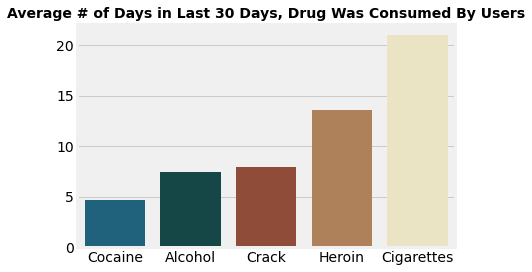

In [373]:
# Plot for average number of days in last 30 days that a drug was consumed by users
plt.figure(figsize = (6,4))
plt.style.use('fivethirtyeight')
subtle = ['#11688b','#0c4f4e','#9d442a','#bc804d','#f2e8bd']
drugs_30_days_mean = [drugs_COCUS30A_mean, drugs_ALCDAYS_mean, drugs_CRKUS30A_mean,drugs_HER30USE_mean, drugs_CIG30USE_mean]
drugs_30_days_mean = pd.Series(drugs_30_days_mean).sort_values()
avg_30 = sns.barplot(x = drugs_30_days_mean.index, y = drugs_30_days_mean.values, palette = subtle)
avg_30.xaxis.set_ticklabels(['Cocaine','Alcohol','Crack','Heroin', 'Cigarettes'])
avg_30.set_title('Average # of Days in Last 30 Days, Drug Was Consumed By Users', weight = 'bold', fontsize = 14)
plt.tight_layout()

We can see that cigarettes demand that they be used more often. Heroin seems to be used more often than crack, alcohol and cocaine coming in at third, fourth and fifth respectively. While it is tempting to say that these numbers reflect a drug's 'addictiveness', there are a myriad of factors that can explain why cigarettes are used more frequently than heroin, not just whether it is more "addictive". Since, addictiveness is not something we can really quantify with numbers, we won't try to, we will just say that certain drugs are reported as being consumed more frequently than others.

In combination with our analysis and intuition we have concluded the following values for drug users:

- A habitual user of cigarettes is anyone who has used cigarettes 15 or more days in the last 30 days.
- A habitual user of alcohol is anyone who has used alcohol 7 or more days in the last 30 days.
- A habitual user of cigarettes is anyone who has used crack 4 or more days in the last 30 days.
- A habitual user of cigarettes is anyone who has used heroin 5 or more days in the last 30 days.
- A habitual user of cigarettes is anyone who has used cocaine 3 or more days in the last 30 days.

Now that we have our values for what constitutes a habitual user, we can isolate the values for habitual users and people who have ever tried each of the five drugs.

In [374]:
#Isolated dataframes for people who have ever tried each of the five drugs
cig_trd = drugs[drugs['CIGEVER'] == 1]
alc_trd = drugs[drugs['ALCEVER'] == 1]
crk_trd = drugs[drugs['CRKEVER'] == 1]
her_trd = drugs[drugs['HEREVER'] == 1]
coc_trd = drugs[drugs['COCEVER'] == 1]

#Isolated dataframes for habitual users of each of the five drugs
cig_hab_1 = drugs[drugs['CIG30USE'] >= 15]
alc_hab_1 = drugs[drugs['ALCDAYS'] >= 7]
crk_hab_1 = drugs[drugs['CRKUS30A'] >= 4]                
her_hab_1 = drugs[drugs['HER30USE'] >= 5]
coc_hab_1 = drugs[drugs['COCUS30A'] >= 3]                

#Further isolated dataframe of habitual user to exclude integers used to demarcate non-users and people who skipped the question
cig_hab = cig_hab_1[cig_hab_1['CIG30USE'] < 31]
alc_hab = alc_hab_1[alc_hab_1['ALCDAYS'] < 31]
crk_hab = crk_hab_1[crk_hab_1['CRKUS30A'] < 31]
her_hab = her_hab_1[her_hab_1['HER30USE'] < 31]
coc_hab = coc_hab_1[coc_hab_1['COCUS30A'] < 31]

#Isolated dataframes for risk to eliminate non imputed values
cig_hab_risk = cig_hab[cig_hab['RISK_CIG'] != 'Risk Not Imputed']
alc_hab_risk = alc_hab[alc_hab['RISK_ALC'] != 'Risk Not Imputed']
her_trd_risk = her_trd[her_trd['RISK_HER'] != 'Risk Not Imputed']
coc_trd_risk = coc_trd[coc_trd['RISK_COC'] != 'Risk Not Imputed']

#Dataframes for percentages of habitual and non-habitual users split into assessed risk groups
cig_hab_risk = cig_hab_risk['RISK_CIG'].value_counts()
cig_hab_risk = (cig_hab_risk/cig_hab_risk.values.sum())*100


alc_hab_risk = alc_hab_risk['RISK_ALC'].value_counts()
alc_hab_risk = (alc_hab_risk/alc_hab_risk.values.sum())*100


her_trd_risk = her_trd_risk['RISK_HER'].value_counts()
her_trd_risk = (her_trd_risk/her_trd_risk.values.sum())*100


coc_trd_risk = coc_trd_risk['RISK_COC'].value_counts()
coc_trd_risk = (coc_trd_risk/coc_trd_risk.values.sum())*100



In [375]:
#Verifying that habitual users have been isolated
print(cig_hab['CIG30USE'].value_counts())
print('\n')
print(alc_hab['ALCDAYS'].value_counts())
print('\n')
print(crk_hab['CRKUS30A'].value_counts())
print('\n')
print(her_hab['HER30USE'].value_counts())
print('\n')
print(coc_hab['COCUS30A'].value_counts())

30.0    96042
20.0     7532
15.0     5722
25.0     4575
28.0     2802
29.0     2019
27.0     1310
26.0      796
24.0      715
18.0      637
23.0      603
22.0      551
17.0      457
21.0      431
16.0      426
19.0      412
Name: CIG30USE, dtype: int64


10.0    19614
15.0    14369
20.0    13845
8.0     13780
12.0    10066
7.0      8754
30.0     7522
25.0     6452
9.0      3761
14.0     2236
16.0     2206
18.0     2114
13.0     1802
28.0     1709
24.0     1280
17.0     1169
11.0     1090
22.0     1012
27.0      886
26.0      885
23.0      762
29.0      713
21.0      670
19.0      556
Name: ALCDAYS, dtype: int64


4.0     82
5.0     81
15.0    62
10.0    60
30.0    55
20.0    51
7.0     35
25.0    34
6.0     33
8.0     30
12.0    27
14.0    14
9.0     12
18.0     9
28.0     9
24.0     8
17.0     6
19.0     6
27.0     6
16.0     5
22.0     5
21.0     5
23.0     5
11.0     4
26.0     3
29.0     3
13.0     2
Name: CRKUS30A, dtype: int64


30.0    151
5.0      47
25.0     45
20.0     44
10.

Below I wrote two functions each for a different purpose. 

The first function, percentage_filter, takes in an isolated dataframe, the complete dataframe, a column that holds our values and a column that acts as a filter. It groups the isolated dataframe and the complete dataframe by year and by the respective filter (i.e. race, gender, age, education, etc.) and makes a count of the number of users (habitual or just using once, depending on the dataframe we have chosen) and total number of participants by year. Then it converts each groupby count object into a dataframe and resets the index so that we have a count per year of the number of particpants and number of users. Then the number of participants is divided by the number of users and multiplied by 100 so that finally we have a dataframe that has the percentage of users per year of a certain drug, grouped by the filter we've chosen. This provides us a dataframe that can be used in a line graph with two separate lines (for gender) or four separate lines (for age range) showing us how the percentage of users in each group has changed over time.

The second function, barplot_percentage_filter, has the same purpose but are not grouped by year. It will create dataframes for each drug user percentage per group(gender, race, education, etc.). The two functions provide similar statistics, the second function gives us percentages for the years 2002-2014 overall, while the first function shows us how those percentages change over time.

In [376]:
#Function to give percentages of users, per group over time
def percentage_filter(user_df, all_df, column, fill):
    year_all = all_df.groupby(['year', fill])
    count_all = year_all[column].count()
    count_all_df = pd.DataFrame(count_all)
    count_all_df.reset_index(inplace = True)
    
    
    year_user = user_df.groupby(['year', fill])
    count_user = year_user[column].count()
    count_user_df = pd.DataFrame(count_user)
    count_user_df.reset_index(inplace=True)
    count_user_df[column] = (count_user_df[column]/count_all_df[column])*100
    return count_user_df
    


In [377]:
#Function to give percentages of users, per group 
def barplot_percentage_filter(user_df, all_df, column, fill):
    fill_all = all_df.groupby(fill)
    count_all = fill_all[column].count()
    count_all_df = pd.DataFrame(count_all)
    count_all_df.reset_index(inplace = True)
    
    
    user = user_df.groupby(fill)
    count_user = user[column].count()
    count_user_df = pd.DataFrame(count_user)
    count_user_df.reset_index(inplace=True)
    count_user_df[column] = (count_user_df[column]/count_all_df[column])*100
    return count_user_df

Now it's time to use each of the two functions to generate dataframes that can be used for plots.

In [378]:
#Overall percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per education group (Suitable for barplot)
barplot_percentage_cig_trd_edu = barplot_percentage_filter(cig_trd, drugs, 'CIGEVER', 'EDUCATION')
barplot_percentage_alc_trd_edu = barplot_percentage_filter(alc_trd, drugs, 'ALCEVER', 'EDUCATION')
barplot_percentage_crk_trd_edu = barplot_percentage_filter(crk_trd, drugs, 'CRKEVER', 'EDUCATION')
barplot_percentage_her_trd_edu = barplot_percentage_filter(her_trd, drugs, 'HEREVER', 'EDUCATION')
barplot_percentage_coc_trd_edu = barplot_percentage_filter(coc_trd, drugs, 'COCEVER', 'EDUCATION')

#Overall percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per education group (Suitable for barplot)
barplot_percentage_cig_hab_edu = barplot_percentage_filter(cig_hab, drugs, 'CIG30USE', 'EDUCATION')
barplot_percentage_alc_hab_edu = barplot_percentage_filter(alc_hab, drugs, 'ALCDAYS', 'EDUCATION')
barplot_percentage_crk_hab_edu = barplot_percentage_filter(crk_hab, drugs, 'CRKUS30A', 'EDUCATION')
barplot_percentage_her_hab_edu = barplot_percentage_filter(her_hab, drugs, 'HER30USE', 'EDUCATION')
barplot_percentage_coc_hab_edu = barplot_percentage_filter(coc_hab, drugs, 'COCUS30A', 'EDUCATION')

#Overall percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per age group (Suitable for barplot)
barplot_percentage_cig_trd_age = barplot_percentage_filter(cig_trd, drugs, 'CIGEVER', 'AGE')
barplot_percentage_alc_trd_age = barplot_percentage_filter(alc_trd, drugs, 'ALCEVER', 'AGE')
barplot_percentage_crk_trd_age = barplot_percentage_filter(crk_trd, drugs, 'CRKEVER', 'AGE')
barplot_percentage_her_trd_age = barplot_percentage_filter(her_trd, drugs, 'HEREVER', 'AGE')
barplot_percentage_coc_trd_age = barplot_percentage_filter(coc_trd, drugs, 'COCEVER', 'AGE')

#Overall percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per age group (Suitable for barplot)
barplot_percentage_cig_hab_age = barplot_percentage_filter(cig_hab, drugs, 'CIG30USE', 'AGE')
barplot_percentage_alc_hab_age = barplot_percentage_filter(alc_hab, drugs, 'ALCDAYS', 'AGE')
barplot_percentage_crk_hab_age = barplot_percentage_filter(crk_hab, drugs, 'CRKUS30A', 'AGE')
barplot_percentage_her_hab_age = barplot_percentage_filter(her_hab, drugs, 'HER30USE', 'AGE')
barplot_percentage_coc_hab_age = barplot_percentage_filter(coc_hab, drugs, 'COCUS30A', 'AGE')

#Overall percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per gender group (Suitable for barplot)
barplot_percentage_cig_trd_sex = barplot_percentage_filter(cig_trd, drugs, 'CIGEVER', 'GENDER')
barplot_percentage_alc_trd_sex = barplot_percentage_filter(alc_trd, drugs, 'ALCEVER', 'GENDER')
barplot_percentage_crk_trd_sex = barplot_percentage_filter(crk_trd, drugs, 'CRKEVER', 'GENDER')
barplot_percentage_her_trd_sex = barplot_percentage_filter(her_trd, drugs, 'HEREVER', 'GENDER')
barplot_percentage_coc_trd_sex = barplot_percentage_filter(coc_trd, drugs, 'COCEVER', 'GENDER')

#Overall percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per gender group (Suitable for barplot)
barplot_percentage_cig_hab_sex = barplot_percentage_filter(cig_hab, drugs, 'CIG30USE', 'GENDER')
barplot_percentage_alc_hab_sex = barplot_percentage_filter(alc_hab, drugs, 'ALCDAYS', 'GENDER')
barplot_percentage_crk_hab_sex = barplot_percentage_filter(crk_hab, drugs, 'CRKUS30A', 'GENDER')
barplot_percentage_her_hab_sex = barplot_percentage_filter(her_hab, drugs, 'HER30USE', 'GENDER')
barplot_percentage_coc_hab_sex = barplot_percentage_filter(coc_hab, drugs, 'COCUS30A', 'GENDER')

#Overall percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per race group (Suitable for barplot)
barplot_percentage_cig_trd_race = barplot_percentage_filter(cig_trd, drugs, 'CIGEVER', 'NEWRACE3')
barplot_percentage_alc_trd_race = barplot_percentage_filter(alc_trd, drugs, 'ALCEVER', 'NEWRACE3')
barplot_percentage_crk_trd_race = barplot_percentage_filter(crk_trd, drugs, 'CRKEVER', 'NEWRACE3')
barplot_percentage_her_trd_race = barplot_percentage_filter(her_trd, drugs, 'HEREVER', 'NEWRACE3')
barplot_percentage_coc_trd_race = barplot_percentage_filter(coc_trd, drugs, 'COCEVER', 'NEWRACE3')

#Overall percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per gender group (Suitable for barplot)
barplot_percentage_cig_hab_race = barplot_percentage_filter(cig_hab, drugs, 'CIG30USE', 'NEWRACE3')
barplot_percentage_alc_hab_race = barplot_percentage_filter(alc_hab, drugs, 'ALCDAYS', 'NEWRACE3')
barplot_percentage_crk_hab_race = barplot_percentage_filter(crk_hab, drugs, 'CRKUS30A', 'NEWRACE3')
barplot_percentage_her_hab_race = barplot_percentage_filter(her_hab, drugs, 'HER30USE', 'NEWRACE3')
barplot_percentage_coc_hab_race = barplot_percentage_filter(coc_hab, drugs, 'COCUS30A', 'NEWRACE3')


As you can see below, we print the dataframe for the percentage of habitual alcohol users per education group overall between 2002-2014. Not surprisingly, a comparatively larger percentage of college graduates habitually drink alcohol.

For ease of writing code and to limit the amount of columns in each dataframe we kept, in this example, ALCDAYS and replaced it's values with percentages instead of renaming it as a new column.

In [379]:
#This dataframe shows us the overall percentage of habitual drinkers by education group overall from 2002 to 2014.
barplot_percentage_alc_hab_edu.head(5)

,EDUCATION,ALCDAYS
0,12-17 years old,2.695138
1,College Graduate,31.759588
2,High School Graduate,19.081666
3,Less Than High School,14.138511
4,Some College,24.477834


In [380]:
#Percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per education group over time (Suitable for line graph)
percentage_cig_trd_edu = percentage_filter(cig_trd, drugs, 'CIGEVER', 'EDUCATION')
percentage_alc_trd_edu = percentage_filter(alc_trd, drugs, 'ALCEVER', 'EDUCATION')
percentage_crk_trd_edu = percentage_filter(crk_trd, drugs, 'CRKEVER', 'EDUCATION')
percentage_her_trd_edu = percentage_filter(her_trd, drugs, 'HEREVER', 'EDUCATION')
percentage_coc_trd_edu = percentage_filter(coc_trd, drugs, 'COCEVER', 'EDUCATION')

#Percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per education group over time (Suitable for line graph)
percentage_cig_hab_edu = percentage_filter(cig_hab, drugs, 'CIG30USE', 'EDUCATION')
percentage_alc_hab_edu = percentage_filter(alc_hab, drugs, 'ALCDAYS', 'EDUCATION')
percentage_crk_hab_edu = percentage_filter(crk_hab, drugs, 'CRKUS30A', 'EDUCATION')
percentage_her_hab_edu = percentage_filter(her_hab, drugs, 'HER30USE', 'EDUCATION')
percentage_coc_hab_edu = percentage_filter(coc_hab, drugs, 'COCUS30A', 'EDUCATION')

#Percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per age group over time (Suitable for line graph)
percentage_cig_trd_age = percentage_filter(cig_trd, drugs, 'CIGEVER', 'AGE')
percentage_alc_trd_age = percentage_filter(alc_trd, drugs, 'ALCEVER', 'AGE')
percentage_crk_trd_age = percentage_filter(crk_trd, drugs, 'CRKEVER', 'AGE')
percentage_her_trd_age = percentage_filter(her_trd, drugs, 'HEREVER', 'AGE')
percentage_coc_trd_age = percentage_filter(coc_trd, drugs, 'COCEVER', 'AGE')

#Percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per age group over time (Suitable for line graph)
percentage_cig_hab_age = percentage_filter(cig_hab, drugs, 'CIG30USE', 'AGE')
percentage_alc_hab_age = percentage_filter(alc_hab, drugs, 'ALCDAYS', 'AGE')
percentage_crk_hab_age = percentage_filter(crk_hab, drugs, 'CRKUS30A', 'AGE')
percentage_her_hab_age = percentage_filter(her_hab, drugs, 'HER30USE', 'AGE')
percentage_coc_hab_age = percentage_filter(coc_hab, drugs, 'COCUS30A', 'AGE')

#Percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per gender group over time (Suitable for line graph)
percentage_cig_trd_sex = percentage_filter(cig_trd, drugs, 'CIGEVER', 'GENDER')
percentage_alc_trd_sex = percentage_filter(alc_trd, drugs, 'ALCEVER', 'GENDER')
percentage_crk_trd_sex = percentage_filter(crk_trd, drugs, 'CRKEVER', 'GENDER')
percentage_her_trd_sex = percentage_filter(her_trd, drugs, 'HEREVER', 'GENDER')
percentage_coc_trd_sex = percentage_filter(coc_trd, drugs, 'COCEVER', 'GENDER')

#Percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per gender group over time (Suitable for line graph)
percentage_cig_hab_sex = percentage_filter(cig_hab, drugs, 'CIG30USE', 'GENDER')
percentage_alc_hab_sex = percentage_filter(alc_hab, drugs, 'ALCDAYS', 'GENDER')
percentage_crk_hab_sex = percentage_filter(crk_hab, drugs, 'CRKUS30A', 'GENDER')
percentage_her_hab_sex = percentage_filter(her_hab, drugs, 'HER30USE', 'GENDER')
percentage_coc_hab_sex = percentage_filter(coc_hab, drugs, 'COCUS30A', 'GENDER')

#Percentages of people who have ever tried cigarettes, alcohol, crack, heroin and cocaine per race group over time (Suitable for line graph)
percentage_cig_trd_race = percentage_filter(cig_trd, drugs, 'CIGEVER', 'NEWRACE3')
percentage_alc_trd_race = percentage_filter(alc_trd, drugs, 'ALCEVER', 'NEWRACE3')
percentage_crk_trd_race = percentage_filter(crk_trd, drugs, 'CRKEVER', 'NEWRACE3')
percentage_her_trd_race = percentage_filter(her_trd, drugs, 'HEREVER', 'NEWRACE3')
percentage_coc_trd_race = percentage_filter(coc_trd, drugs, 'COCEVER', 'NEWRACE3')

#Percentages of people who are habitual users of cigarettes, alcohol, crack, heroin and cocaine per gender group over time (Suitable for line graph)
percentage_cig_hab_race = percentage_filter(cig_hab, drugs, 'CIG30USE', 'NEWRACE3')
percentage_alc_hab_race = percentage_filter(alc_hab, drugs, 'ALCDAYS', 'NEWRACE3')
percentage_crk_hab_race = percentage_filter(crk_hab, drugs, 'CRKUS30A', 'NEWRACE3')
percentage_her_hab_race = percentage_filter(her_hab, drugs, 'HER30USE', 'NEWRACE3')
percentage_coc_hab_race = percentage_filter(coc_hab, drugs, 'COCUS30A', 'NEWRACE3')

This dataframe below has similar information except that all percentages are ordered by race and year so that we have a plot point for every race's percentage of people who have ever tried alcohol. There are 7 races and 13 years so our dataframe consists of 91 rows. Every dataframe in the code cell above should contain 91 rows.

In [381]:
#Percentage of people in race group who have ever tried alcohol
percentage_alc_trd_race

,year,NEWRACE3,ALCEVER
0,2002.0,African American,65.565112
1,2002.0,Asian,59.293804
2,2002.0,Hispanic,68.581529
3,2002.0,Mixed Race,71.563484
4,2002.0,Native American,74.873524
5,2002.0,Pacific Islander,69.961977
6,2002.0,White,77.169170
7,2003.0,African American,64.686277
8,2003.0,Asian,60.034110
9,2003.0,Hispanic,69.328002


In 2012 there were no Pacific Islanders who reported as having tried heroin. Therefore, this makes the dataframe for the percentages of race groups who have tried heroin, 1 row short, thus throwing off our calculations. I found a user defined function that will insert a necessary row with zeros.

In [382]:
#Function that inserts a row in the middle of a dataframe with proper index
def Insert_row(row_number, df, row_value):
    # Starting value of upper half
    start_upper = 0
  
    # End value of upper half
    end_upper = row_number
  
    # Start value of lower half
    start_lower = row_number
  
    # End value of lower half
    end_lower = df.shape[0]
  
    # Create a list of upper_half index
    upper_half = [*range(start_upper, end_upper, 1)]
  
    # Create a list of lower_half index
    lower_half = [*range(start_lower, end_lower, 1)]
  
    # Increment the value of lower half by 1
    lower_half = [x.__add__(1) for x in lower_half]
  
    # Combine the two lists
    index_ = upper_half + lower_half
  
    # Update the index of the dataframe
    df.index = index_
  
    # Insert a row at the end
    df.loc[row_number] = row_value
   
    # Sort the index labels
    df = df.sort_index()
  
    # return the dataframe
    return df

#Grouping the tried heroin dataframe to create new dataframe
her_gr = her_trd.groupby(['year', 'NEWRACE3'])
count_her_gr = her_gr['HEREVER'].count()
count_her_df = pd.DataFrame(count_her_gr)
count_her_df.reset_index(inplace = True)

print(count_her_df)

print('\n')
#Grouping the drugs dataframe by year and race to create similar dataframe to above dataframe for calculations
all_gr = drugs.groupby(['year', 'NEWRACE3'])
count_all_gr = all_gr['HEREVER'].count()
count_all_df = pd.DataFrame(count_all_gr)
count_all_df.reset_index(inplace = True)

print(count_all_df)

      year          NEWRACE3  HEREVER
0   2002.0  African American       63
1   2002.0             Asian        7
2   2002.0          Hispanic       66
3   2002.0        Mixed Race       21
4   2002.0   Native American       11
5   2002.0  Pacific Islander        4
6   2002.0             White      535
7   2003.0  African American       65
8   2003.0             Asian        9
9   2003.0          Hispanic       84
10  2003.0        Mixed Race       26
11  2003.0   Native American       10
12  2003.0  Pacific Islander        2
13  2003.0             White      577
14  2004.0  African American       63
15  2004.0             Asian        8
16  2004.0          Hispanic       78
17  2004.0        Mixed Race       26
18  2004.0   Native American       14
19  2004.0  Pacific Islander        3
20  2004.0             White      510
21  2005.0  African American       59
22  2005.0             Asian        8
23  2005.0          Hispanic       71
24  2005.0        Mixed Race       25
25  2005.0  

In [383]:
#Using function to inser row and reassigning it to original dataframe
count_her_df = Insert_row(75, count_her_df, [2012, 'Pacific Islander', 0])
print(count_her_df)
percentage_her_trd_race = count_her_df


      year          NEWRACE3  HEREVER
0   2002.0  African American       63
1   2002.0             Asian        7
2   2002.0          Hispanic       66
3   2002.0        Mixed Race       21
4   2002.0   Native American       11
5   2002.0  Pacific Islander        4
6   2002.0             White      535
7   2003.0  African American       65
8   2003.0             Asian        9
9   2003.0          Hispanic       84
10  2003.0        Mixed Race       26
11  2003.0   Native American       10
12  2003.0  Pacific Islander        2
13  2003.0             White      577
14  2004.0  African American       63
15  2004.0             Asian        8
16  2004.0          Hispanic       78
17  2004.0        Mixed Race       26
18  2004.0   Native American       14
19  2004.0  Pacific Islander        3
20  2004.0             White      510
21  2005.0  African American       59
22  2005.0             Asian        8
23  2005.0          Hispanic       71
24  2005.0        Mixed Race       25
25  2005.0  

In [384]:
#Exchanging the HEREVER values with percentage values for each race
percentage_her_trd_race['HEREVER'] = (count_her_df['HEREVER']/count_all_df['HEREVER'])*100
print(percentage_her_trd_race)

      year          NEWRACE3   HEREVER
0   2002.0  African American  0.950656
1   2002.0             Asian  0.466356
2   2002.0          Hispanic  0.972161
3   2002.0        Mixed Race  2.203568
4   2002.0   Native American  1.854975
5   2002.0  Pacific Islander  1.520913
6   2002.0             White  1.432281
7   2003.0  African American  0.941892
8   2003.0             Asian  0.511654
9   2003.0          Hispanic  1.083452
10  2003.0        Mixed Race  1.937407
11  2003.0   Native American  1.351351
12  2003.0  Pacific Islander  0.858369
13  2003.0             White  1.580735
14  2004.0  African American  0.911722
15  2004.0             Asian  0.441501
16  2004.0          Hispanic  0.996169
17  2004.0        Mixed Race  1.706037
18  2004.0   Native American  1.785714
19  2004.0  Pacific Islander  1.376147
20  2004.0             White  1.396342
21  2005.0  African American  0.839977
22  2005.0             Asian  0.435256
23  2005.0          Hispanic  0.840535
24  2005.0        Mixed R

In [385]:
print(percentage_cig_hab_race.shape) 
print(percentage_alc_hab_race.shape) 
print(percentage_crk_trd_race.shape)  
print(percentage_her_trd_race.shape)  
print(percentage_coc_trd_race.shape) 

(91, 3)
(91, 3)
(91, 3)
(91, 3)
(91, 3)


Next, we print the dataframe for the percentage of people who have ever tried heroin per age group in every individual year from 2002-2014. This gives us a dataframe that we can segment into age groups and plot across time.

In [386]:
pd.set_option('display.max_rows', None)
percentage_her_trd_age

,year,AGE,HEREVER
0,2002.0,12-17 Years Old,0.361398
1,2002.0,18-25 Years Old,1.680957
2,2002.0,26-34 Years Old,1.356239
3,2002.0,35+ Years Old,2.059182
4,2003.0,12-17 Years Old,0.390024
5,2003.0,18-25 Years Old,1.773378
6,2003.0,26-34 Years Old,1.923768
7,2003.0,35+ Years Old,2.056418
8,2004.0,12-17 Years Old,0.338909
9,2004.0,18-25 Years Old,1.688769


In addition to finding the average amount of days a user takes a particular drug, it would be interesting to know the average age a person first tried a drug. This can give us insight into several things:

- At what age a person might become vulnerable to being introduced to a particular drug
- A progression or order in which a person might try several drugs
- Information that might help us in further analysis if we wanted to calculate probabilities of chances someone would become addicted to a drug given that person's age

Below we've isolated the columns and values for users' average age when they first tried each of the five drugs.

In [387]:
# Isolation of values of relavent ages where users first took drug
# Mean of age when first took drug


drugs_CIGTRY_mean = drugs[drugs['CIGTRY'] < 100]['CIGTRY'].mean()

drugs_ALCTRY_mean = drugs[drugs['ALCTRY'] < 100]['ALCTRY'].mean()

drugs_CRKAGE_mean = drugs[drugs['CRKAGE'] < 100]['CRKAGE'].mean()

drugs_HERAGE_mean = drugs[drugs['HERAGE'] < 100]['HERAGE'].mean()

drugs_COCAGE_mean = drugs[drugs['COCAGE'] < 100]['COCAGE'].mean()

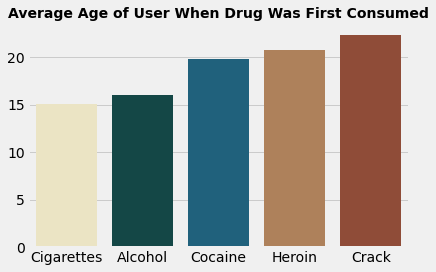

In [388]:
# Plot for average age of a user when drug was first consumed
plt.figure(figsize = (6,4))
plt.style.use('fivethirtyeight')
subtle_age = ['#f2e8bd','#0c4f4e','#11688b','#bc804d','#9d442a']
drugs_try_age_mean = [drugs_CIGTRY_mean,drugs_ALCTRY_mean, drugs_COCAGE_mean,drugs_HERAGE_mean,drugs_CRKAGE_mean ]
drugs_try_age_mean = pd.Series(drugs_try_age_mean).sort_values()
avg_try_age = sns.barplot(x = drugs_try_age_mean.index, y = drugs_try_age_mean.values, palette = subtle_age)
avg_try_age.xaxis.set_ticklabels(['Cigarettes','Alcohol','Cocaine','Heroin', 'Crack'])
avg_try_age.set_title('Average Age of User When Drug Was First Consumed', weight = 'bold', fontsize = 14)
plt.tight_layout()

In [389]:
drugs_try_age_mean

0    15.067362
1    15.991245
2    19.850632
3    20.785156
4    22.369253
dtype: float64

We can see from this graph which drugs tend to be drugs that people take when they're older. Normally people start with cigarettes, we would probably assume because the legal age to buy cigarettes is 18. Whereas the legal age to buy alcohol is 21. Then we come to illegal substances where we see an increase and cocaine is tried before heroin, followed by crack.

Getting insight into the times of the year when people first tried a drug can also give us insight into times of the year when drug use increases and decreases. Below we used counts of the number of users whose first introduction to a particular drug happened in a given month. We again excluded people who did not answer or reported that they never tried the drug.

In [390]:
# Isolation of values corresponding to months
# Putting series into count format, series already in order from Jan-Dec
cig_months = drugs[drugs['CIGMFU'] < 13]
cig_months_cnt = cig_months['CIGMFU'].value_counts(dropna = True)

alc_months = drugs[drugs['ALCMFU'] < 13]
alc_months_cnt = alc_months['ALCMFU'].value_counts(dropna = True)

crk_months = drugs[drugs['CRKMFU'] < 13]
crk_months_cnt = crk_months['CRKMFU'].value_counts(dropna = True)

her_months = drugs[drugs['HERMFU'] < 13]
her_months_cnt = her_months['HERMFU'].value_counts(dropna = True)

coc_months = drugs[drugs['COCMFU'] < 13]
coc_months_cnt = coc_months['COCMFU'].value_counts(dropna = False)

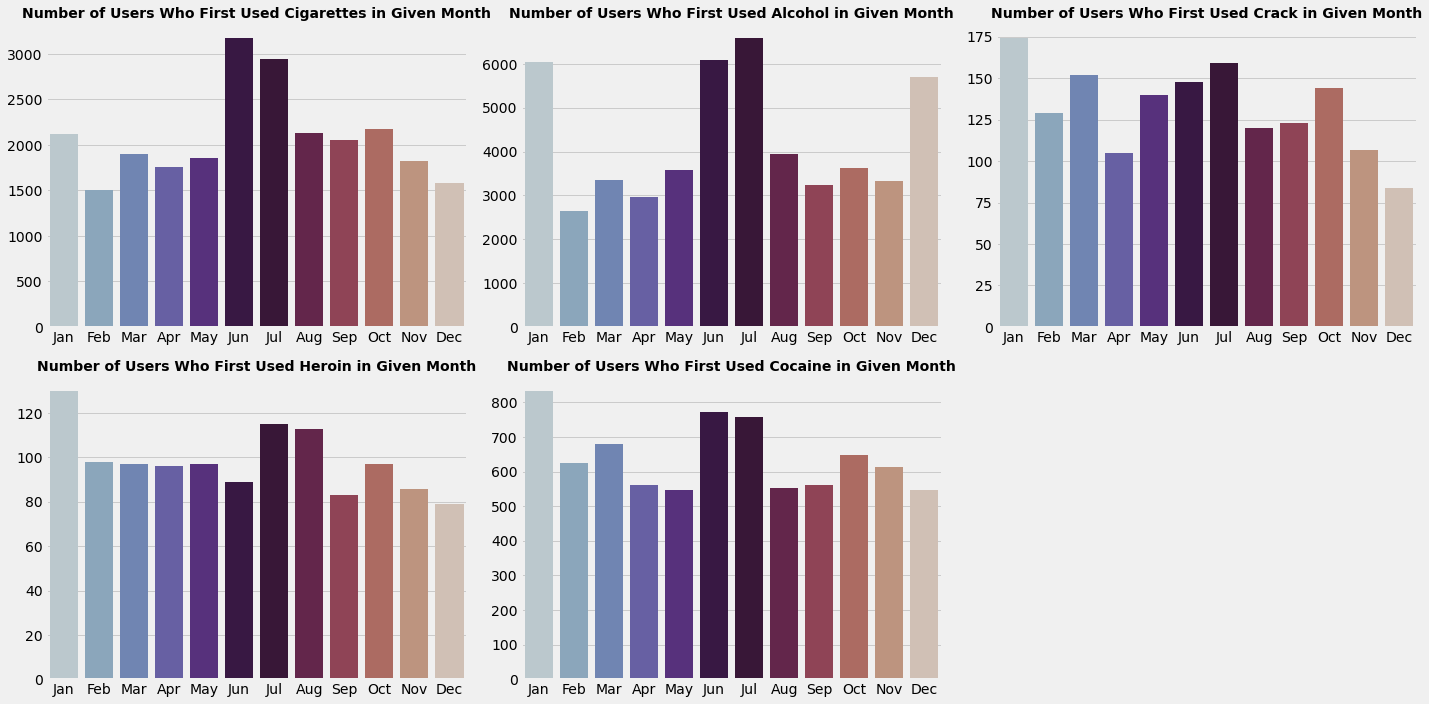

In [391]:
# Plot for number of user of drug where first use was in a given month
fig, axx = plt.subplots(2,3, figsize = (20,10))

plt.style.use('fivethirtyeight')
sns.barplot(x = cig_months_cnt.index, y = cig_months_cnt.values, palette = 'twilight', ax = axx[0,0])
axx[0,0].xaxis.set_ticklabels(['Jan','Feb','Mar','Apr', 'May', 'Jun','Jul','Aug', 'Sep','Oct', 'Nov', 'Dec'])
axx[0,0].set_title('Number of Users Who First Used Cigarettes in Given Month', weight = 'bold', fontsize = 14)

sns.barplot(x = alc_months_cnt.index, y = alc_months_cnt.values, palette = 'twilight', ax = axx[0,1])
axx[0,1].xaxis.set_ticklabels(['Jan','Feb','Mar','Apr', 'May', 'Jun','Jul','Aug', 'Sep','Oct', 'Nov', 'Dec'])
axx[0,1].set_title('Number of Users Who First Used Alcohol in Given Month', weight = 'bold', fontsize = 14)

sns.barplot(x = crk_months_cnt.index, y = crk_months_cnt.values, palette = 'twilight', ax = axx[0,2])
axx[0,2].xaxis.set_ticklabels(['Jan','Feb','Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
axx[0,2].set_title('Number of Users Who First Used Crack in Given Month', weight = 'bold', fontsize = 14)

sns.barplot(x = her_months_cnt.index, y = her_months_cnt.values, palette = 'twilight', ax = axx[1,0])
axx[1,0].xaxis.set_ticklabels(['Jan','Feb','Mar','Apr', 'May', 'Jun','Jul','Aug', 'Sep','Oct', 'Nov', 'Dec'])
axx[1,0].set_title('Number of Users Who First Used Heroin in Given Month', weight = 'bold', fontsize = 14)

sns.barplot(x = coc_months_cnt.index, y = coc_months_cnt.values, palette = 'twilight', ax = axx[1,1])
axx[1,1].xaxis.set_ticklabels(['Jan','Feb','Mar','Apr', 'May', 'Jun','Jul','Aug', 'Sep','Oct', 'Nov', 'Dec'])
axx[1,1].set_title('Number of Users Who First Used Cocaine in Given Month', weight = 'bold', fontsize = 14)

fig.delaxes(axx[1][2])
plt.tight_layout()

We can see that alcohol and cigarettes are most likely to be first tried in June and July. Given that the average age where people try cigarettes, about 15 years old, and alcohol, about 16 years old, we could surmise that the reason for such a high number of people trying cigarettes and alcohol in June and July is that this is typical vacation for students in high school. Given the extra time, they might have more opportunities to try these drugs. While we don't know this for a fact, the evidence would support that hypothesis.

While June and July are also popular months for the first introduction to cocaine, heroin and crack, January overtakes those months as the most popular month to try all three drugs. The reason for this is unclear based on the data. Contrary to popular belief several studies show that suicide rates rise in spring and therefore it is unlikely to be correlated to more frequent drugs use based on our data.

Explanations aside, January, June and July seem to be popular months to experiment with drugs.

Before we begin our analysis on different demographics, it should be noted that it was not possible to get an equal distribution of gender, nor race, nor age group. For this reason percentages of the different demographics were used. It is however noteworthy to know what the distributions of these demographics were.

In [392]:
drugs['GENDER'].value_counts(normalize = True)*100

Women    51.969976
Men      48.030024
Name: GENDER, dtype: float64

As we can see about 52% of women and 48% of men were surveyed.

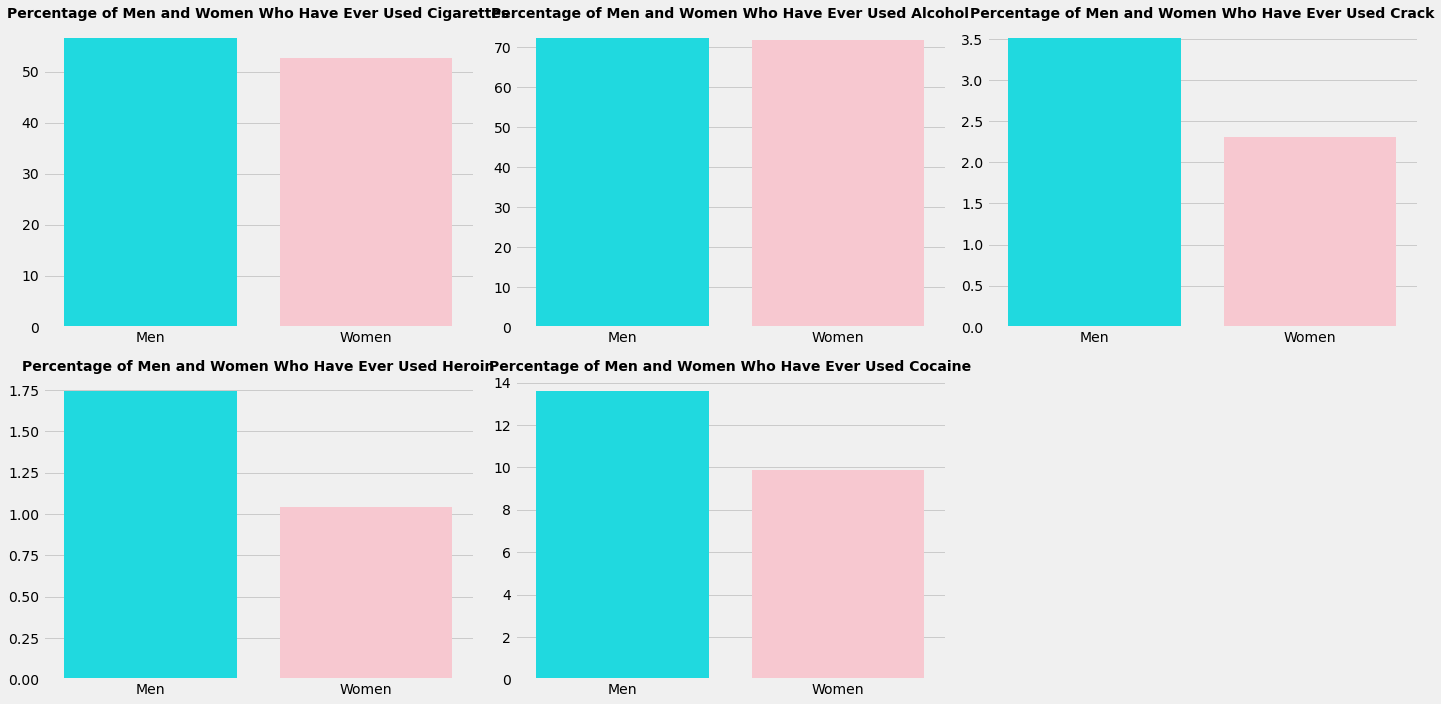

In [393]:
# Count of number of men and women who ever consumed drug
# Distribution: 48% Male participants, 52% Female participants
fig, axx = plt.subplots(2,3, figsize = (20,10))
men_women = ['#00f7ff','#ffc0cb']
plt.style.use('fivethirtyeight')
sns.barplot(x = barplot_percentage_cig_trd_sex['GENDER'], y = barplot_percentage_cig_trd_sex['CIGEVER'], palette = men_women, ax = axx[0,0], order = ['Men','Women'])
axx[0,0].set_title('Percentage of Men and Women Who Have Ever Used Cigarettes', weight = 'bold', fontsize = 14)
axx[0,0].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_alc_trd_sex['GENDER'], y = barplot_percentage_alc_trd_sex['ALCEVER'], palette = men_women, ax = axx[0,1], order = ['Men','Women'])
axx[0,1].set_title('Percentage of Men and Women Who Have Ever Used Alcohol', weight = 'bold', fontsize = 14)
axx[0,1].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_crk_trd_sex['GENDER'], y = barplot_percentage_crk_trd_sex['CRKEVER'], palette = men_women, ax = axx[0,2], order = ['Men','Women'])
axx[0,2].set_title('Percentage of Men and Women Who Have Ever Used Crack', weight = 'bold', fontsize = 14)
axx[0,2].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_her_trd_sex['GENDER'], y = barplot_percentage_her_trd_sex['HEREVER'], palette = men_women, ax = axx[1,0], order = ['Men','Women'])
axx[1,0].set_title('Percentage of Men and Women Who Have Ever Used Heroin', weight = 'bold', fontsize = 14)
axx[1,0].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_coc_trd_sex['GENDER'], y = barplot_percentage_coc_trd_sex['COCEVER'], palette = men_women, ax = axx[1,1], order = ['Men','Women'])
axx[1,1].set_title('Percentage of Men and Women Who Have Ever Used Cocaine', weight = 'bold', fontsize = 14)
axx[1,1].set(xlabel = '', ylabel = "")

fig.delaxes(axx[1][2])
plt.tight_layout()

We can see that men are much more likely to try drugs than women are. With the exception of alcohol, where for all intent and purposes the percentages are equal. Heroin is the least tried drug whereas alcohol is the most tried drug.

Now that we know the percentages of men and women who have ever tried the drug. I'd find it more interesting and more relavent to our original question to find out what percentages of men and women are habitual users of our five drugs.

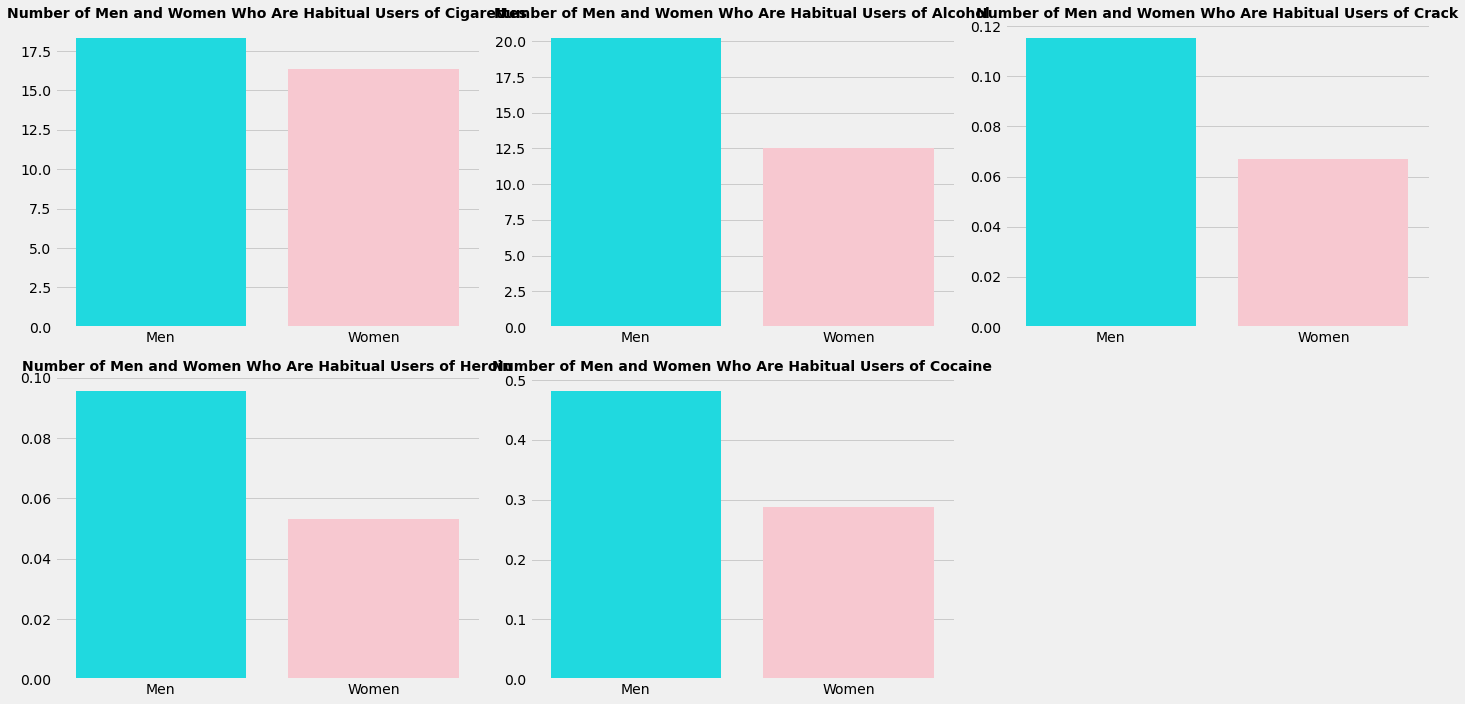

In [394]:
# Count of number of men and women who ever consumed drug
# Distribution: 48% Male participants, 52% Female participants
fig, axx = plt.subplots(2,3, figsize = (20,10))
men_women = ['#00f7ff','#ffc0cb']
plt.style.use('fivethirtyeight')
sns.barplot(x = barplot_percentage_cig_hab_sex['GENDER'], y = barplot_percentage_cig_hab_sex['CIG30USE'], palette = men_women, ax = axx[0,0], order = ['Men', 'Women'])
axx[0,0].set_title('Number of Men and Women Who Are Habitual Users of Cigarettes', weight = 'bold', fontsize = 14)
axx[0,0].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_alc_hab_sex['GENDER'], y = barplot_percentage_alc_hab_sex['ALCDAYS'],  palette = men_women, ax = axx[0,1], order = ['Men', 'Women'])
axx[0,1].set_title('Number of Men and Women Who Are Habitual Users of Alcohol', weight = 'bold', fontsize = 14)
axx[0,1].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_crk_hab_sex['GENDER'], y = barplot_percentage_crk_hab_sex['CRKUS30A'], palette = men_women, ax = axx[0,2], order = ['Men', 'Women'])
axx[0,2].set_title('Number of Men and Women Who Are Habitual Users of Crack', weight = 'bold', fontsize = 14)
axx[0,2].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_her_hab_sex['GENDER'], y = barplot_percentage_her_hab_sex['HER30USE'], palette = men_women, ax = axx[1,0], order = ['Men', 'Women'])
axx[1,0].set_title('Number of Men and Women Who Are Habitual Users of Heroin', weight = 'bold', fontsize = 14)
axx[1,0].set(xlabel = '', ylabel = "")

sns.barplot(x = barplot_percentage_coc_hab_sex['GENDER'], y = barplot_percentage_coc_hab_sex['COCUS30A'], palette = men_women, ax = axx[1,1], order = ['Men', 'Women'])
axx[1,1].set_title('Number of Men and Women Who Are Habitual Users of Cocaine', weight = 'bold', fontsize = 14)
axx[1,1].set(xlabel = '', ylabel = "")

fig.delaxes(axx[1][2])
plt.tight_layout()

We can see that the number of habitual users of alcohol changes where there are more men than women who use the drug habitually. Relatively, the other drugs have about the same ratios of men and women when we compare the results of people who have just tried the drugs.

Our next demographic we want to calculate the percentages for are age groups. Again we can see the distribution of the participants among the four age ranges are drastically uneven.

In [395]:
drugs['AGE'].value_counts(normalize = True)*100

18-25 Years Old    32.496962
12-17 Years Old    31.861941
35+ Years Old      25.186822
26-34 Years Old    10.454276
Name: AGE, dtype: float64

- 31.9% of the participants were aged 12-17 years old.
- 32.5% of the participants were aged 18-25 years old.
- 10.5% of the participants were aged 26-34 years old.
- 25.2% of the participants were 35 years of age or older.

As we did for gender, we will plot the percentages of participants who have ever used the five drugs within the different age groups.

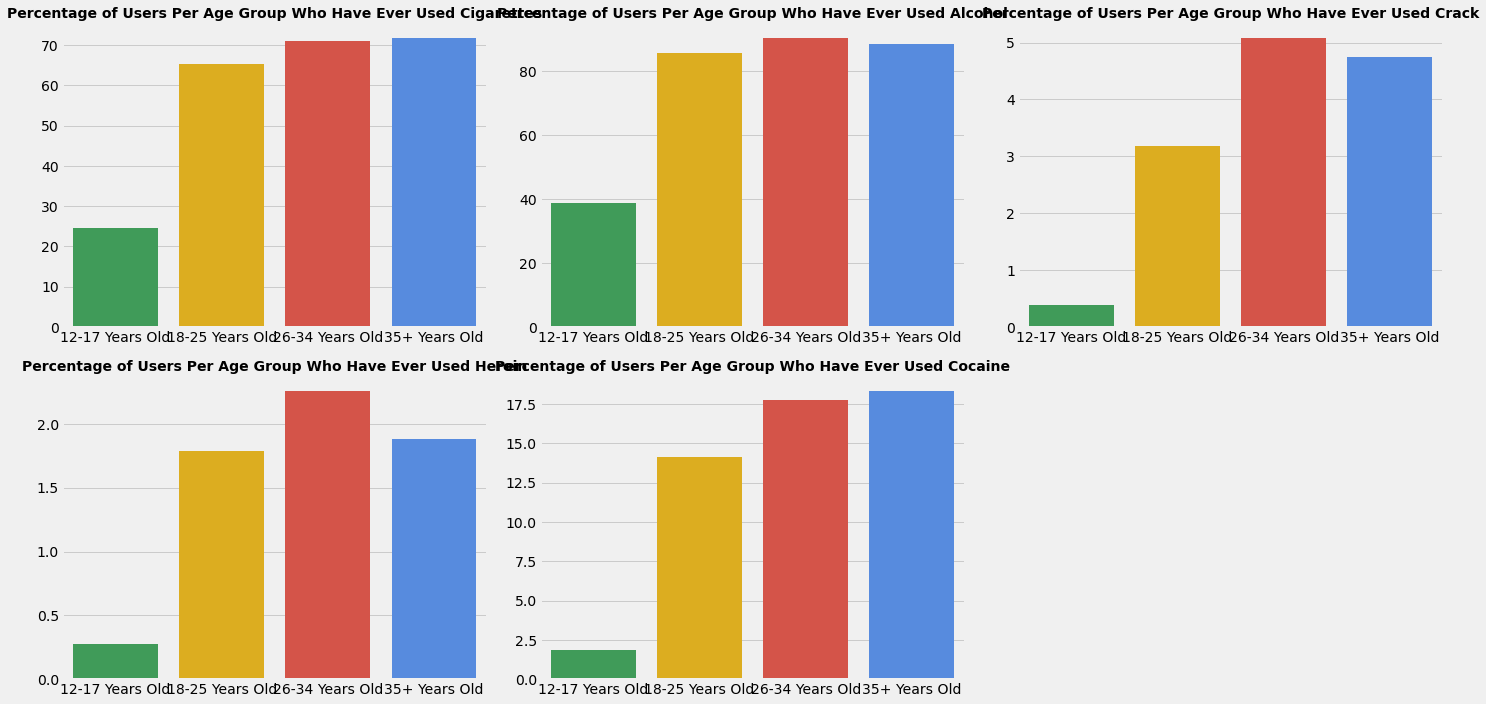

In [396]:
# Plotted percentages of people who have ever used cigarettes, alcohol, crack, heroin and cocaine by age group 
fig, axx = plt.subplots(2,3, figsize = (20,10))
age_palette = ['#31aa52', '#fbbd01', '#eb4132','#4086f4']
plt.style.use('fivethirtyeight')
sns.barplot(x = barplot_percentage_cig_trd_age['AGE'], y = barplot_percentage_cig_trd_age['CIGEVER'] , palette = age_palette, ax = axx[0,0], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[0,0].set(xlabel = '', ylabel = '')
axx[0,0].set_title('Percentage of Users Per Age Group Who Have Ever Used Cigarettes', weight = 'bold', fontsize = 14)

sns.barplot(x = barplot_percentage_alc_trd_age['AGE'], y = barplot_percentage_alc_trd_age['ALCEVER'], palette = age_palette, ax = axx[0,1], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[0,1].set(xlabel = '', ylabel = '')
axx[0,1].set_title('Percentage of Users Per Age Group Who Have Ever Used Alcohol', weight = 'bold', fontsize = 14)

sns.barplot(x = barplot_percentage_crk_trd_age['AGE'], y = barplot_percentage_crk_trd_age['CRKEVER'], palette = age_palette, ax = axx[0,2], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[0,2].set(xlabel = '', ylabel = '')
axx[0,2].set_title('Percentage of Users Per Age Group Who Have Ever Used Crack', weight = 'bold', fontsize = 14)

sns.barplot(x = barplot_percentage_her_trd_age['AGE'], y = barplot_percentage_her_trd_age['HEREVER'], palette = age_palette, ax = axx[1,0], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[1,0].set(xlabel = '', ylabel = '')
axx[1,0].set_title('Percentage of Users Per Age Group Who Have Ever Used Heroin', weight = 'bold', fontsize = 14)

sns.barplot(x = barplot_percentage_coc_trd_age['AGE'], y = barplot_percentage_coc_trd_age['COCEVER'], palette = age_palette, ax = axx[1,1], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[1,1].set(xlabel = '', ylabel = '')
axx[1,1].set_title('Percentage of Users Per Age Group Who Have Ever Used Cocaine', weight = 'bold', fontsize = 14)

fig.delaxes(axx[1][2])
plt.tight_layout()

For cigarettes and alcohol, all three older aged groups have about the same percentage of users between 65%-70% for cigarettes and 85%-90% for alcohol respectively. For cocaine about 18-19% of people older than 26 have tried it. Heroin and crack seem to be more popular for people aged 26-34 years old. Let's see if these trends hold when we compare with habitual users.

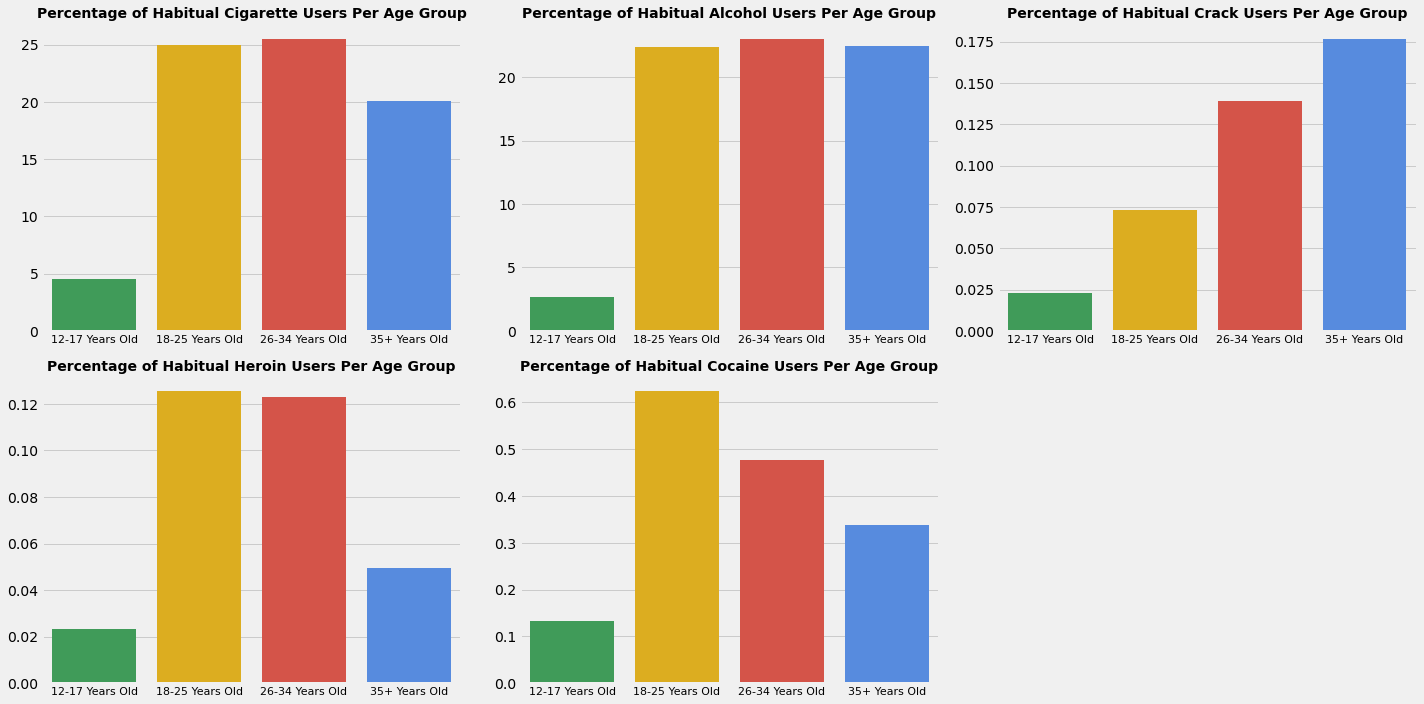

In [397]:
# Plot of percentages of habitual users of cigarettes, alcohol, crack, heroin and cocaine by age group 
# Way to read plot: Ex. About 25% of people aged 26-34 are habitual users of cigarettes
fig, axx = plt.subplots(2,3, figsize = (20,10))
plt.style.use('fivethirtyeight')

sns.barplot(x = barplot_percentage_cig_hab_age['AGE'], y = barplot_percentage_cig_hab_age['CIG30USE'], palette = age_palette, ax = axx[0,0], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[0,0].set_title('Percentage of Habitual Cigarette Users Per Age Group', weight = 'bold', fontsize = 14)
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_alc_hab_age['AGE'], y = barplot_percentage_alc_hab_age['ALCDAYS'], palette = age_palette, ax = axx[0,1], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].set_title('Percentage of Habitual Alcohol Users Per Age Group', weight = 'bold', fontsize = 14)
axx[0,1].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_crk_hab_age['AGE'], y = barplot_percentage_crk_hab_age['CRKUS30A'], palette = age_palette, ax = axx[0,2], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[0,2].set(xlabel = '', ylabel = "")
axx[0,2].set_title('Percentage of Habitual Crack Users Per Age Group', weight = 'bold', fontsize = 14)
axx[0,2].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_her_hab_age['AGE'], y = barplot_percentage_her_hab_age['HER30USE'], palette = age_palette, ax = axx[1,0], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].set_title('Percentage of Habitual Heroin Users Per Age Group', weight = 'bold', fontsize = 14)
axx[1,0].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_coc_hab_age['AGE'], y = barplot_percentage_coc_hab_age['COCUS30A'], palette = age_palette, ax = axx[1,1], order = ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35+ Years Old'], ci = None)
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].set_title('Percentage of Habitual Cocaine Users Per Age Group', weight = 'bold', fontsize = 14)
axx[1,1].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

fig.delaxes(axx[1][2])
plt.tight_layout()




For habitual users of cigarettes and alcohol most everything remained the same relative to one another except that there isn't as high a percentage of habitual cigarette users for people 35 or older. Crack seems to be an older person's drug as the percentages gradually increase as age increases. Heroin and cocaine seem to be drugs for young adults. As expected in all drug categories, people aged 12-17 years old have the lowest percentage of habitual users.

The next area of interest is race. The distribution of the races were once again unevenly distributed.

In [398]:
drugs['NEWRACE3'].value_counts(normalize = True)*100

White               63.125222
Hispanic            15.730910
African American    12.651894
Asian                3.521581
Mixed Race           3.036571
Native American      1.456415
Pacific Islander     0.477406
Name: NEWRACE3, dtype: float64

- 63.1% of the survey participants were White
- 15.7% of the survey participants were Hispanic
- 12.7% of the survey participants were African-American
- 3.5%  of the survey participants were Asian
- 3.0%  of the survey participants were Mixed Race
- 1.5%  of the survey participants were Native American
- 0.5%  of the survey participants were Pacific Islanders

White people were more than four times as represented than the next frequent race. Because of this, even with percentages, it's hard to build a profile based on race because some races just weren't represented to say with a certain level of certainty that they are representative of their race nationally.

Regardless of that, we will build the visualizations and percentages of people who have ever taken the five drugs.

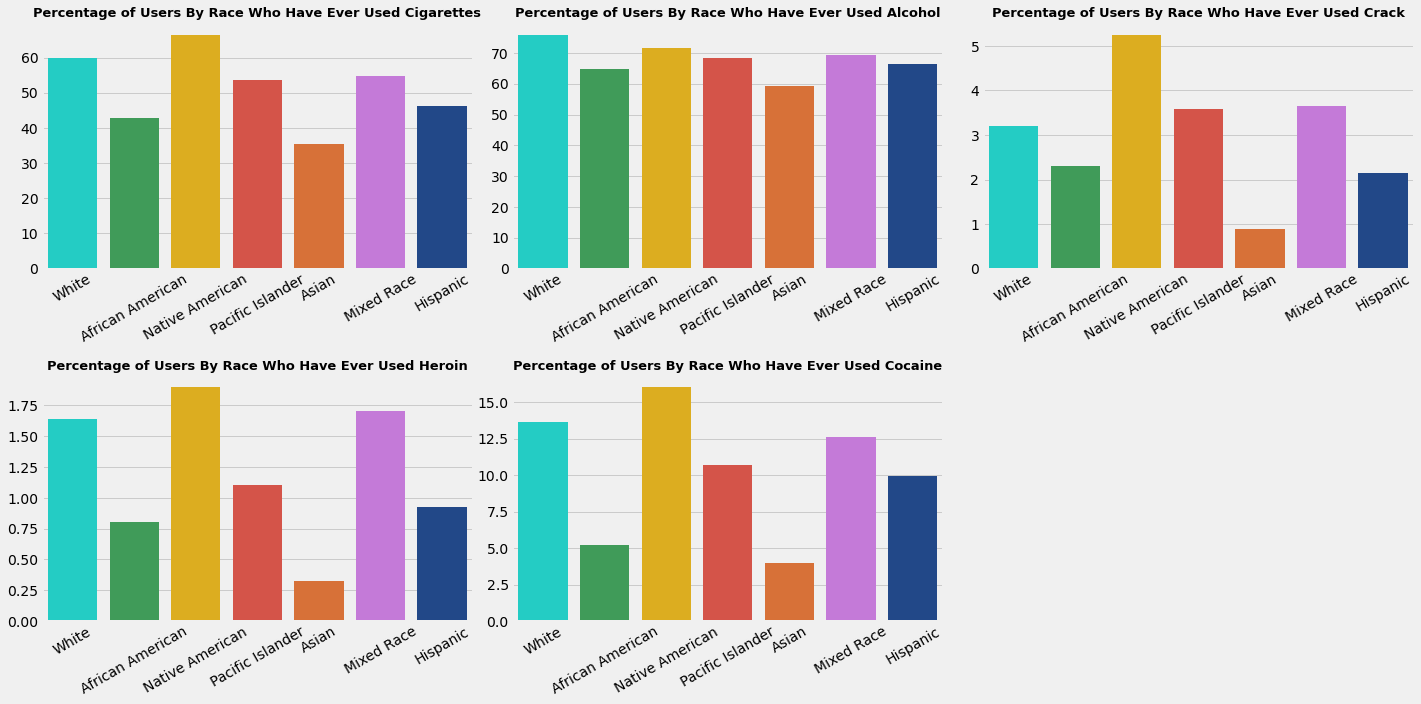

In [399]:
# Plot of different percentages of race groups who have ever taken drug
# Percentage of race groups who took survey, 1-White- 63.1% of TP, 2-African-Americans- 12.7% of TP, 3-Native American 1.5% of TP, 4-Pacific Islander 0.5% of TP, 5- Asian 3.5% of TP, 6- Mixed Race 3.0% of TP, 7- Hispanic 15.7% of TP
# TP = Total Participants
fig, axx = plt.subplots(2,3, figsize = (20,10))

plt.style.use('fivethirtyeight')
sns.barplot(x = barplot_percentage_cig_trd_race['NEWRACE3'], y = barplot_percentage_cig_trd_race['CIGEVER'] , palette = line_race, ax = axx[0,0], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[0,0].set_xticklabels(labels = axx[0,0].get_xticklabels(), rotation=30)
axx[0,0].set(xlabel = '', ylabel = '')
axx[0,0].set_title('Percentage of Users By Race Who Have Ever Used Cigarettes', weight = 'bold', fontsize = 13)

sns.barplot(x = barplot_percentage_alc_trd_race['NEWRACE3'], y = barplot_percentage_alc_trd_race['ALCEVER'] , palette = line_race, ax = axx[0,1], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[0,1].set_xticklabels(labels = axx[0,1].get_xticklabels(), rotation=30)
axx[0,1].set(xlabel = '', ylabel = '')
axx[0,1].set_title('Percentage of Users By Race Who Have Ever Used Alcohol', weight = 'bold', fontsize = 13)

sns.barplot(x = barplot_percentage_crk_trd_race['NEWRACE3'], y = barplot_percentage_crk_trd_race['CRKEVER'] , palette = line_race, ax = axx[0,2], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[0,2].set_xticklabels(labels = axx[0,2].get_xticklabels(), rotation=30)
axx[0,2].set(xlabel = '', ylabel = '')
axx[0,2].set_title('Percentage of Users By Race Who Have Ever Used Crack', weight = 'bold', fontsize = 13)

sns.barplot(x = barplot_percentage_her_trd_race['NEWRACE3'], y = barplot_percentage_her_trd_race['HEREVER'] , palette = line_race, ax = axx[1,0], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[1,0].set_xticklabels(labels = axx[1,0].get_xticklabels(), rotation=30)
axx[1,0].set(xlabel = '', ylabel = '')
axx[1,0].set_title('Percentage of Users By Race Who Have Ever Used Heroin', weight = 'bold', fontsize = 13)

sns.barplot(x = barplot_percentage_coc_trd_race['NEWRACE3'], y = barplot_percentage_coc_trd_race['COCEVER'] , palette = line_race, ax = axx[1,1], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[1,1].set_xticklabels(labels = axx[1,1].get_xticklabels(), rotation=30)
axx[1,1].set(xlabel = '', ylabel = '')
axx[1,1].set_title('Percentage of Users By Race Who Have Ever Used Cocaine', weight = 'bold', fontsize = 13)


fig.delaxes(axx[1][2])
plt.tight_layout()

From our visualizations, it appears that the Native American community is susceptible to at least experimenting with all five of these drugs more than any other race. With the exception of alcohol, giving a slight edge to white people. For most of the drugs, with the exception of crack, the next race that has tried them most frequently is white people. Asians were the race across all five drugs that tried the least amount of drugs.

Now that we've taken a look at what races have tried the five drugs, let's look at the races who are habitual users.

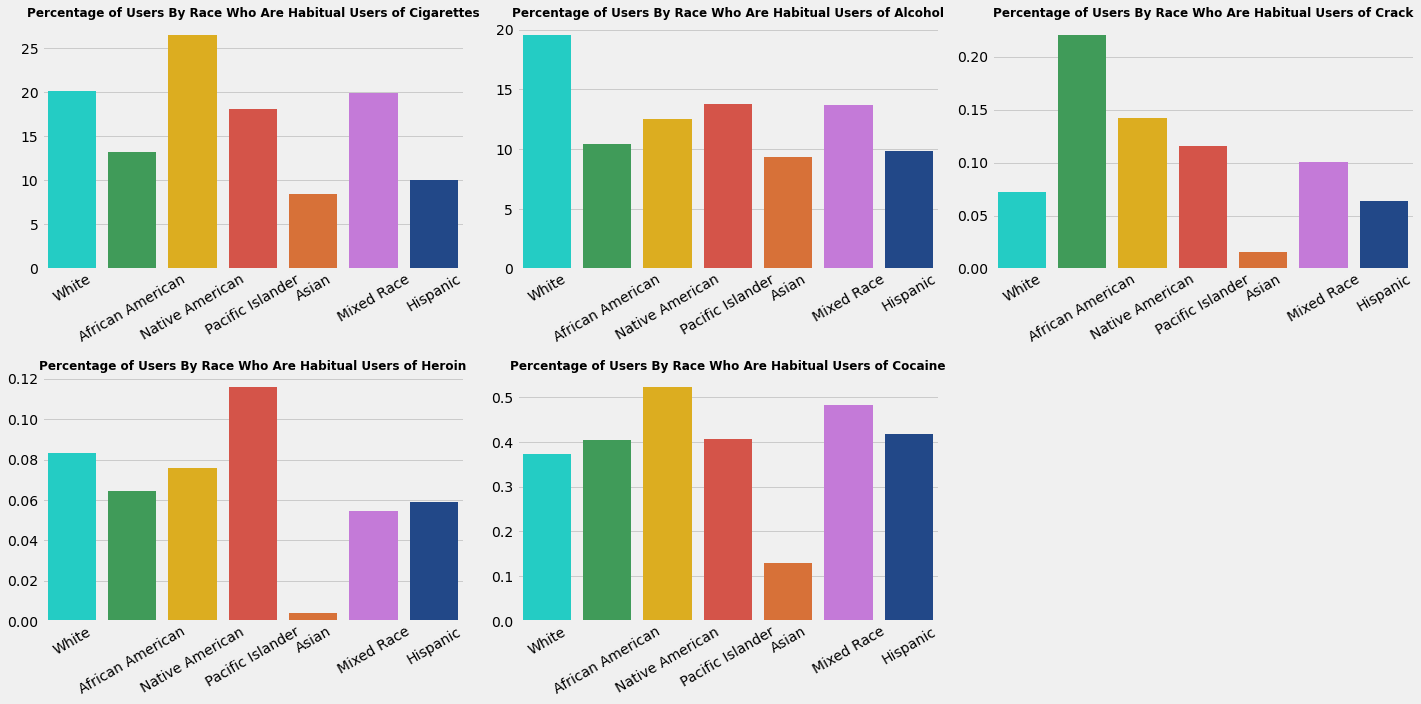

In [400]:
# Plot of different percentages of race groups who are habitual users of cigarettes, alcohol, crack, heroin, cocaine
# Percentage of race groups who took survey, 1-White- 63.1% of TP, 2-African-Americans- 12.7% of TP, 3-Native American 1.5% of TP, 4-Pacific Islander 0.5% of TP, 5- Asian 3.5% of TP, 6- Mixed Race 3.0% of TP, 7- Hispanic 15.7% of TP
# TP = Total Participants
# Way to read plot: Ex. About 17% of people mixed race people are habitual users of cigarettes
fig, axx = plt.subplots(2,3, figsize = (20,10))
line_race = ['#08e8de','#31aa52','#fbbd01','#eb4132','#f16a1d','#cd6ae8','#114499']

sns.barplot(x = barplot_percentage_cig_hab_race['NEWRACE3'], y = barplot_percentage_cig_hab_race['CIG30USE'] , palette = line_race, ax = axx[0,0], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].set_xticklabels(labels = axx[0,0].get_xticklabels(), rotation=30)
axx[0,0].set_title('Percentage of Users By Race Who Are Habitual Users of Cigarettes', weight = 'bold', fontsize = 12)

sns.barplot(x = barplot_percentage_alc_hab_race['NEWRACE3'], y = barplot_percentage_alc_hab_race['ALCDAYS'] , palette = line_race, ax = axx[0,1], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].set_xticklabels(labels = axx[0,1].get_xticklabels(), rotation=30)
axx[0,1].set_title('Percentage of Users By Race Who Are Habitual Users of Alcohol', weight = 'bold', fontsize = 12)

sns.barplot(x = barplot_percentage_crk_hab_race['NEWRACE3'], y = barplot_percentage_crk_hab_race['CRKUS30A'] , palette = line_race, ax = axx[0,2], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[0,2].set(xlabel = '', ylabel = "")
axx[0,2].set_xticklabels(labels = axx[0,2].get_xticklabels(), rotation=30)
axx[0,2].set_title('Percentage of Users By Race Who Are Habitual Users of Crack', weight = 'bold', fontsize = 12)

sns.barplot(x = barplot_percentage_her_hab_race['NEWRACE3'], y = barplot_percentage_her_hab_race['HER30USE'] , palette = line_race, ax = axx[1,0], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].set_xticklabels(labels = axx[1,0].get_xticklabels(), rotation=30)
axx[1,0].set_title('Percentage of Users By Race Who Are Habitual Users of Heroin', weight = 'bold', fontsize = 12)

sns.barplot(x = barplot_percentage_coc_hab_race['NEWRACE3'], y = barplot_percentage_coc_hab_race['COCUS30A'] , palette = line_race, ax = axx[1,1], order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'], ci = None)
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].set_xticklabels(labels = axx[1,1].get_xticklabels(), rotation=30)
axx[1,1].set_title('Percentage of Users By Race Who Are Habitual Users of Cocaine', weight = 'bold', fontsize = 12)

fig.delaxes(axx[1][2])
plt.tight_layout()

When we look at habitual users, the distributions are a bit different. Native Americans have the highest percentage of habitual users for cigarettes, heroin and cocaine. White people by far have the highest percentage of habitual users at almost 20%. African-Americans by far have the highest percentage of habitual users of crack.

It should be noted that the differences by number of people are much smaller than they appear on the barplots. For example:

In [401]:
# Total number of participants by race
print(drugs['NEWRACE3'].value_counts().sort_index())
print('\n')
# Percentages of habitual heroin users by race
print(barplot_percentage_her_hab_race)
print('\n')
# Multiply percentages of habitual heroin users by total number of participants
# Gives a count of total habitual heroin users sorted by race
drd = pd.Series(drugs['NEWRACE3'].value_counts().sort_index())
print((drd * barplot_percentage_her_hab_race['HER30USE'].values)/100)

print('\n')
native = drugs[drugs['NEWRACE3'] == 'Native American'][['NEWRACE3','HER30USE', 'year']]
native_less = native[native['HER30USE'] < 31]
native_her_hab = native_less[native_less['HER30USE'] > 4]
print(native_her_hab)

African American     91509
Asian                25471
Hispanic            113779
Mixed Race           21963
Native American      10534
Pacific Islander      3453
White               456574
Name: NEWRACE3, dtype: int64


           NEWRACE3  HER30USE
0  African American  0.064475
1             Asian  0.003926
2          Hispanic  0.058886
3        Mixed Race  0.054637
4   Native American  0.075945
5  Pacific Islander  0.115841
6             White  0.083448


African American     59.0
Asian                 1.0
Hispanic             67.0
Mixed Race           12.0
Native American       8.0
Pacific Islander      4.0
White               381.0
Name: NEWRACE3, dtype: float64


               NEWRACE3  HER30USE    year
19003   Native American      22.0  2002.0
38562   Native American      25.0  2002.0
109922  Native American      21.0  2004.0
147356  Native American      15.0  2004.0
456739  Native American      30.0  2010.0
509713  Native American       5.0  2011.0
634651  Native American      

There are a few takeaways here:

It's quite hard to believe that over the course of 13 years of doing this survey that the team, out of 25,471 Asian participants, that only one person habitually used heroin. There are similar low numbers across all races. Surely, the team imputed the data correctly but this is a survey. Therefore, the data can be false.

It's also interesting that Native Americans have the highest percentage of participants that habitually use heroin yet, those participants that make up that percentage are comprised of 8 individuals. It would be irresponsible to say that these 8 individuals represent a drug problem among the Native American community. It must be reiterated that these 8 individuals were surveyed over the course of 13 years. Looking at the individual rows in which these individuals were surveyed, from 2005-2009 there were zero Native American survey takers who reported as being habitual heroin users.

It's fair and responsible to conclude that we cannot cite race as any reliable indicator of whether someone might be susceptible to hard drug use. There's just not enough data of actual users of hard drugs reporting they are indeed habitual users. There's also too uneven of a distribution among the races to rely on any percentage to give us any real insight. 

For the continuation of our analysis we will limit our interest to:

- Habitual users of cigarettes and alcohol
- People who have ever tried cocaine, heroin and crack

We will do this for a few reasons:

Significantly large percentages of participants have tried cigarettes and alcohol at least once and these are drugs that are much more interesting to gain insight from habitual users rather than people who have just tried them once.

There's simply not enough reported data of people being habitual users of cocaine, heroin or crack to rely on it to make any conclusions or build a profile. Therefore we will cite using these drugs at least once as more interesting for analysis.

Next, we move onto education groups. Let's look at the distribution of people surveyed among the education groups.

In [402]:
drugs['EDUCATION'].value_counts(normalize = True)*100

12-17 years old          31.861941
High School Graduate     22.315055
Some College             19.673074
College Graduate         14.650973
Less Than High School    11.498957
Name: EDUCATION, dtype: float64

- 31.9% of the survey participants were aged 12-17 years old
- 22.3% of the survey participants were high school graduates
- 19.7% of the survey participants had some college education
- 14.7% of the survey participants were college graduates
- 11.5% of the survey participants had less than high school education

The distribution is a bit more even than the race distribution although still uneven. About one third of the survey participants were aged 12-17 years old.

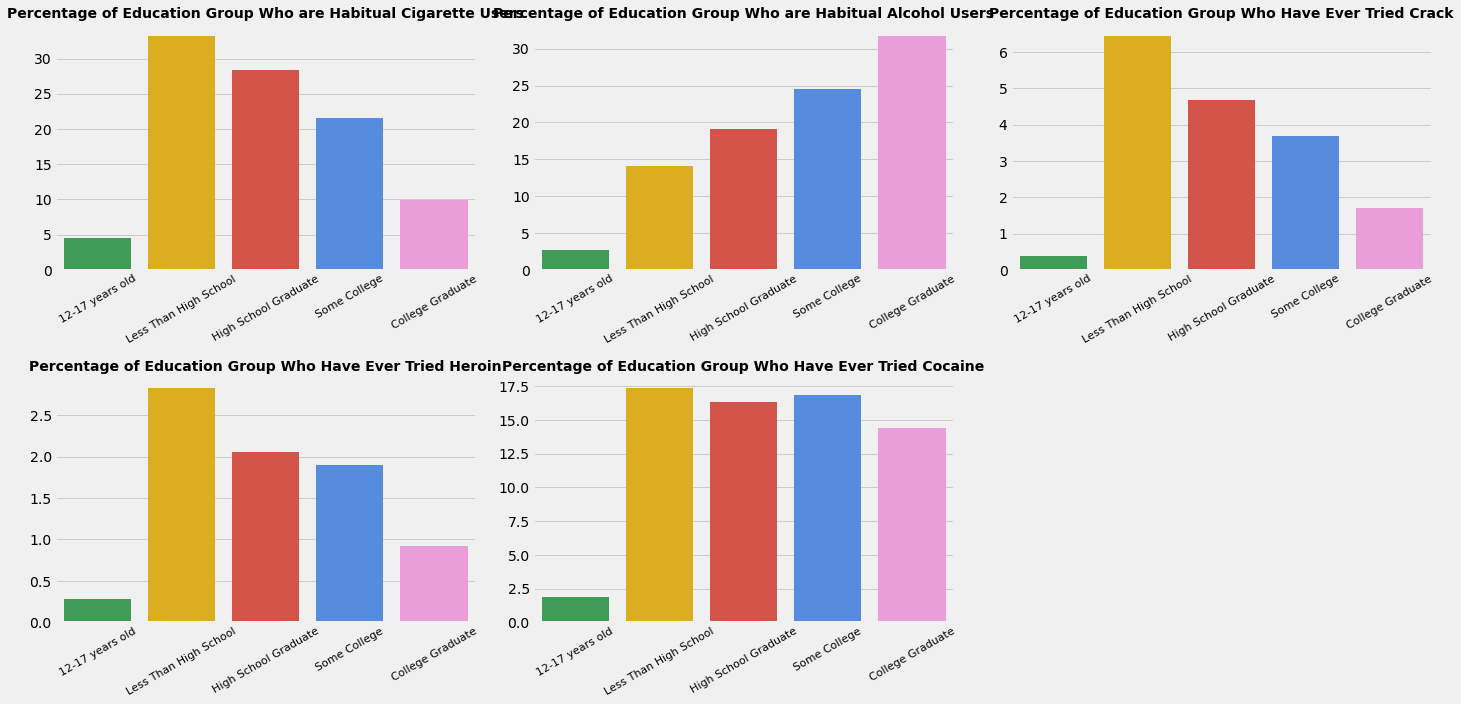

In [403]:
# Plot of different percentages of most education achieved groups who are habitual users
# Percentage of most education achieved groups who took survey, 1-12-17 years olds-31.5% of TP, 2-Less Than High School- 10.7% of TP, 3-High School Graduate- 22.4% of TP, 4-Some College-20.2% of TP, 5- College Graduate 15.2% of TP
# TP = Total Participants
fig, axx = plt.subplots(2,3, figsize = (20,10))
edu_palette = ['#31aa52', '#fbbd01', '#eb4132','#4086f4', '#f592e2']

sns.barplot(x = barplot_percentage_cig_hab_edu['EDUCATION'], y = barplot_percentage_cig_hab_edu['CIG30USE'], palette = edu_palette, ax = axx[0,0], ci = None, order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].set_title('Percentage of Education Group Who are Habitual Cigarette Users', weight = 'bold', fontsize = 14)
axx[0,0].set_xticklabels(labels = axx[0,0].get_xticklabels(), rotation=30)
axx[0,0].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_alc_hab_edu['EDUCATION'], y = barplot_percentage_alc_hab_edu['ALCDAYS'], palette = edu_palette, ax = axx[0,1], ci = None, order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].set_title('Percentage of Education Group Who are Habitual Alcohol Users', weight = 'bold', fontsize = 14)
axx[0,1].set_xticklabels(labels = axx[0,1].get_xticklabels(), rotation=30)
axx[0,1].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_crk_trd_edu['EDUCATION'], y = barplot_percentage_crk_trd_edu['CRKEVER'], palette = edu_palette, ax = axx[0,2], ci = None, order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[0,2].set(xlabel = '', ylabel = "")
axx[0,2].set_title('Percentage of Education Group Who Have Ever Tried Crack', weight = 'bold', fontsize = 14)
axx[0,2].set_xticklabels(labels = axx[0,2].get_xticklabels(), rotation=30)
axx[0,2].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_her_trd_edu['EDUCATION'], y = barplot_percentage_her_trd_edu['HEREVER'], palette = edu_palette, ax = axx[1,0], ci = None, order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].set_title('Percentage of Education Group Who Have Ever Tried Heroin', weight = 'bold', fontsize = 14)
axx[1,0].set_xticklabels(labels = axx[1,0].get_xticklabels(), rotation=30)
axx[1,0].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

sns.barplot(x = barplot_percentage_coc_trd_edu['EDUCATION'], y = barplot_percentage_coc_trd_edu['COCEVER'], palette = edu_palette, ax = axx[1,1], ci = None, order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].set_title('Percentage of Education Group Who Have Ever Tried Cocaine', weight = 'bold', fontsize = 14)
axx[1,1].set_xticklabels(labels = axx[1,1].get_xticklabels(), rotation=30)
axx[1,1].set_xticklabels(labels = axx[0,0].get_xticklabels(), fontsize = 11)

fig.delaxes(axx[1][2])
plt.tight_layout()
plt.savefig('C:\\Users\\wally\\OneDrive\\Pictures\\Data Analysis Youtube\\funny.jpeg')

For most of the drugs there seems to be a linear relationship with level of education and percentage of people in each education group who take the drugs or are habitual users. For crack, heroin and cocaine and cigarettes, with the exception of 12-17 years olds, it seems that the more educated the participants were, they tried those drugs less and had a lower percentage of habitual cigarette users. 

As for alcohol it has the opposite linear relationship. Participant percentages of habitual alcohol user were higher the more educated they were. Nearly 35% of college graduates were habitual users of alcohol.

Let's now take a look at risk assessment. Survey participants were asked to assess the risk of taking each drug at what would be considered very unhealthy levels. Here is the breakdown for each drug.

- ALCOHOL: RISK HAVING 4 OR 5 DRINKS NEARLY EVERY DAY
- COCAINE: RISK USING COCAINE ONCE OR TWICE A WEEK
- HEROIN: RISK USING HEROIN ONCE OR TWICE A WEEK
- CIGARETTES: RISK SMOKING 1 OR MORE PACKS CIGARETTES PER DAY

Participants were not asked to assess the risk for crack.

The participants were divided into groups based on their risk assessment answers:

- No Risk
- Slight Risk
- Moderate Risk
- Great Risk

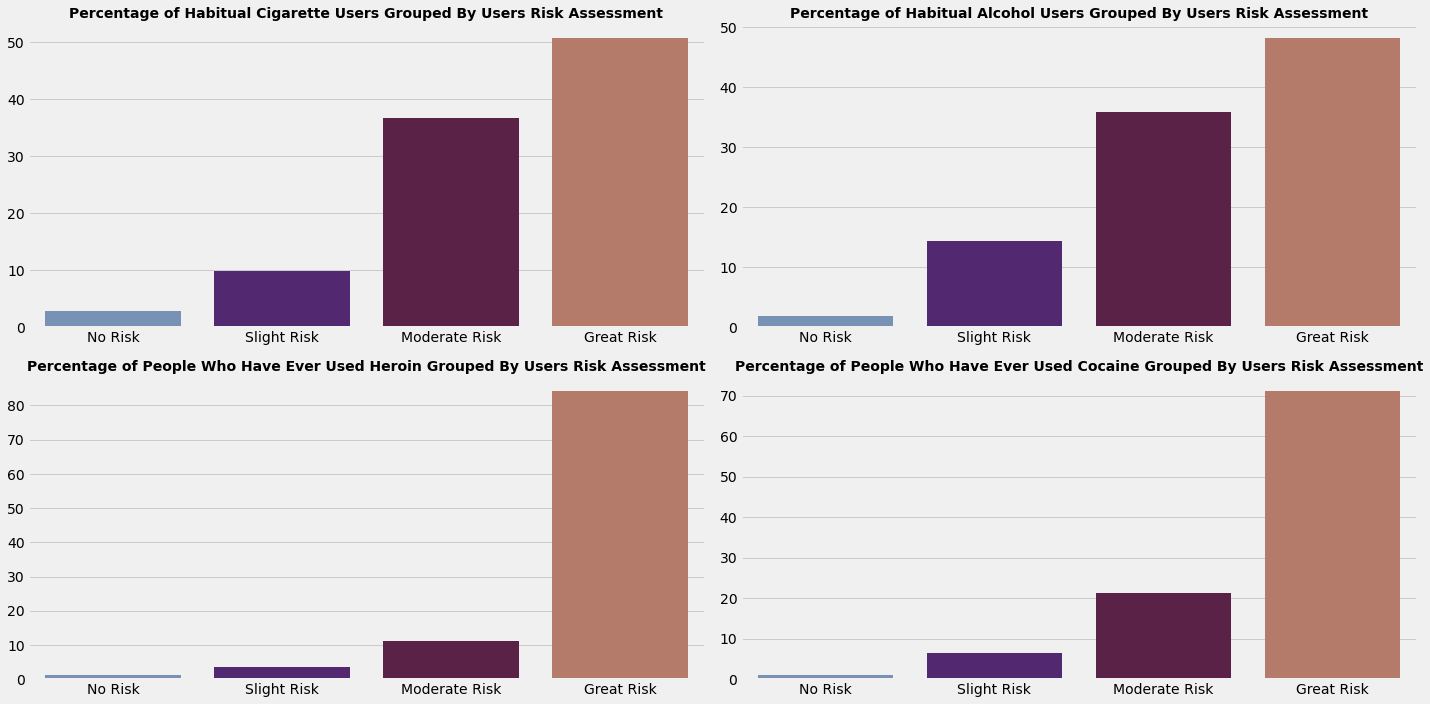

In [404]:
#Percentages of habitual users of cigarettes and alcohol and participants who have ever used cocaine or heroin by risk assessment group
fig, axx = plt.subplots(2,2, figsize = (20,10))


plt.style.use('fivethirtyeight')
sns.barplot(x = cig_hab_risk.index, y = cig_hab_risk.values, order = ['No Risk','Slight Risk', 'Moderate Risk', 'Great Risk'], ci = None, palette = 'twilight', ax = axx[0,0])
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].set_title('Percentage of Habitual Cigarette Users Grouped By Users Risk Assessment', weight = 'bold', fontsize = 14)

sns.barplot(x = alc_hab_risk.index, y = alc_hab_risk.values, order = ['No Risk','Slight Risk', 'Moderate Risk', 'Great Risk'], ci = None, palette = 'twilight', ax = axx[0,1])
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].set_title('Percentage of Habitual Alcohol Users Grouped By Users Risk Assessment', weight = 'bold', fontsize = 14)

sns.barplot(x = her_trd_risk.index, y = her_trd_risk.values, order = ['No Risk','Slight Risk', 'Moderate Risk', 'Great Risk'], ci = None, palette = 'twilight', ax = axx[1,0])
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].set_title('Percentage of People Who Have Ever Used Heroin Grouped By Users Risk Assessment', weight = 'bold', fontsize = 14)

sns.barplot(x = coc_trd_risk.index, y = coc_trd_risk.values, order = ['No Risk','Slight Risk', 'Moderate Risk', 'Great Risk'], ci = None, palette = 'twilight', ax = axx[1,1])
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].set_title('Percentage of People Who Have Ever Used Cocaine Grouped By Users Risk Assessment', weight = 'bold', fontsize = 14)




plt.tight_layout()

It seems that knowledge of the risk of using such drugs doesn't necessarily deter users. About 50% of habitual cigarette and alcohol users assess that it is a great risk to their health. Predictably so, 80% of people who have tried heroin and 70% of people who have tried cocaine assess that it is of great risk to their health to habitually do these drugs. What would be interesting to know is the assessment from the participants for how addictive each of these drugs were or their assessment of how whether trying a drug once increases the chances that they might become addicted.

Now that we have analyzed habitual users of cigarettes and alcohol and participants who have ever tried crack, heroin and cocaine based on gender, race, education, age and risk assessment, we'd like to know how the these percentages of habitual users and participants who have tried the drugs has changed over time and see if we can find any patterns.

Below are lineplots generated to show how habitual use and experimentation with the various drugs based on gender have changed over time from 2002 to 2014.

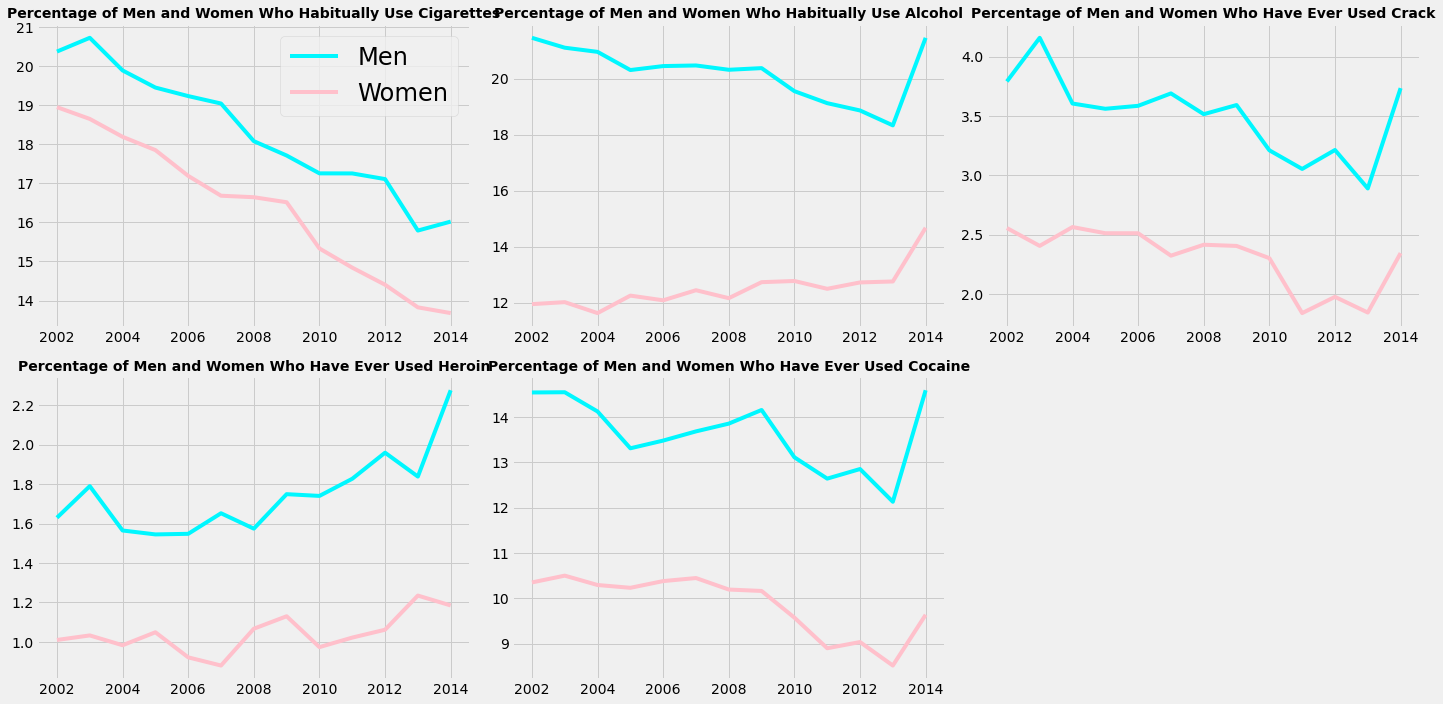

In [405]:
#Percentages per year of habitual cigarette and alcohol users and people who have ever tried crack, cocaine or heroin grouped by gender
fig, axx = plt.subplots(2,3, figsize = (20,10))
men_women = ['#00f7ff','#ffc0cb']
plt.style.use('fivethirtyeight')

sns.lineplot(x = percentage_cig_hab_sex['year'], y = percentage_cig_hab_sex['CIG30USE'], hue = percentage_cig_hab_sex['GENDER'], palette = men_women, ax = axx[0,0], hue_order = ['Men', 'Women'])
axx[0,0].set_title('Percentage of Men and Women Who Habitually Use Cigarettes', weight = 'bold', fontsize = 14)
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].legend(loc = 'upper right', fontsize = 'xx-large')

sns.lineplot(x = percentage_alc_hab_sex['year'], y = percentage_alc_hab_sex['ALCDAYS'], hue = percentage_alc_hab_sex['GENDER'], palette = men_women, ax = axx[0,1], hue_order = ['Men', 'Women'])
axx[0,1].set_title('Percentage of Men and Women Who Habitually Use Alcohol', weight = 'bold', fontsize = 14)
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].get_legend().remove()

sns.lineplot(x = percentage_crk_trd_sex['year'], y = percentage_crk_trd_sex['CRKEVER'], hue = percentage_crk_trd_sex['GENDER'], palette = men_women, ax = axx[0,2], hue_order = ['Men', 'Women'])
axx[0,2].set_title('Percentage of Men and Women Who Have Ever Used Crack', weight = 'bold', fontsize = 14)
axx[0,2].set(xlabel = '', ylabel = "")
axx[0,2].get_legend().remove()

sns.lineplot(x = percentage_her_trd_sex['year'], y = percentage_her_trd_sex['HEREVER'], hue = percentage_her_trd_sex['GENDER'], palette = men_women, ax = axx[1,0], hue_order = ['Men', 'Women'])
axx[1,0].set_title('Percentage of Men and Women Who Have Ever Used Heroin', weight = 'bold', fontsize = 14)
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].get_legend().remove()

sns.lineplot(x = percentage_coc_trd_sex['year'], y = percentage_coc_trd_sex['COCEVER'], hue = percentage_coc_trd_sex['GENDER'], palette = men_women, ax = axx[1,1], hue_order = ['Men', 'Women'])
axx[1,1].set_title('Percentage of Men and Women Who Have Ever Used Cocaine', weight = 'bold', fontsize = 14)
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].get_legend().remove()


fig.delaxes(axx[1][2])
plt.tight_layout()


Based on our data we can see the following trends for each of the five drugs. It is noted that these were reported by participants and may or may not reflect actual use.

- Cigarettes:
The percentage of habitual cigarette smokers has steadily declined by 5% by both men and women over the last 13 years.


- Alcohol:
The percentage of men who were habitually drinking alcohol was declining from 2002 to 2009. That decline accelerated every year from 2009 to 2013 before suddenly spiking back to originally percentages in 2014. The percentage of women who were habitually drinking alcohol, while significantly lower than men, was increasing over time and like men had a sudden increase in 2014.


- Crack:
Percentages of people experimenting with crack was decreasing for both men and women until a sudden increase in 2014. They did not reach back to their original level in 2002 despite this spike.


- Heroin:
Heroin experimentation is actually on the rise since 2002 for both men and women. We see another sharp increase in 2014 but only for men.


- Cocaine:
Cocaine experimentation for men was decreasing from 2002 to 2005. Then we see an increase from 2006-2009, followed by another decrease from 2010 to 2013, then another sharp increase in 2014, returning to the same percentage in 2002. For women there was a steady decrease from 2002-2013 and then also a sharp increase in 2014 although, the increase did not move the percentage back to the same level in 2002.


We can see that something must've happened in 2014. We won't speculate on what that reason could be but it is interesting to note.

Next, we move onto trends among the age groups.

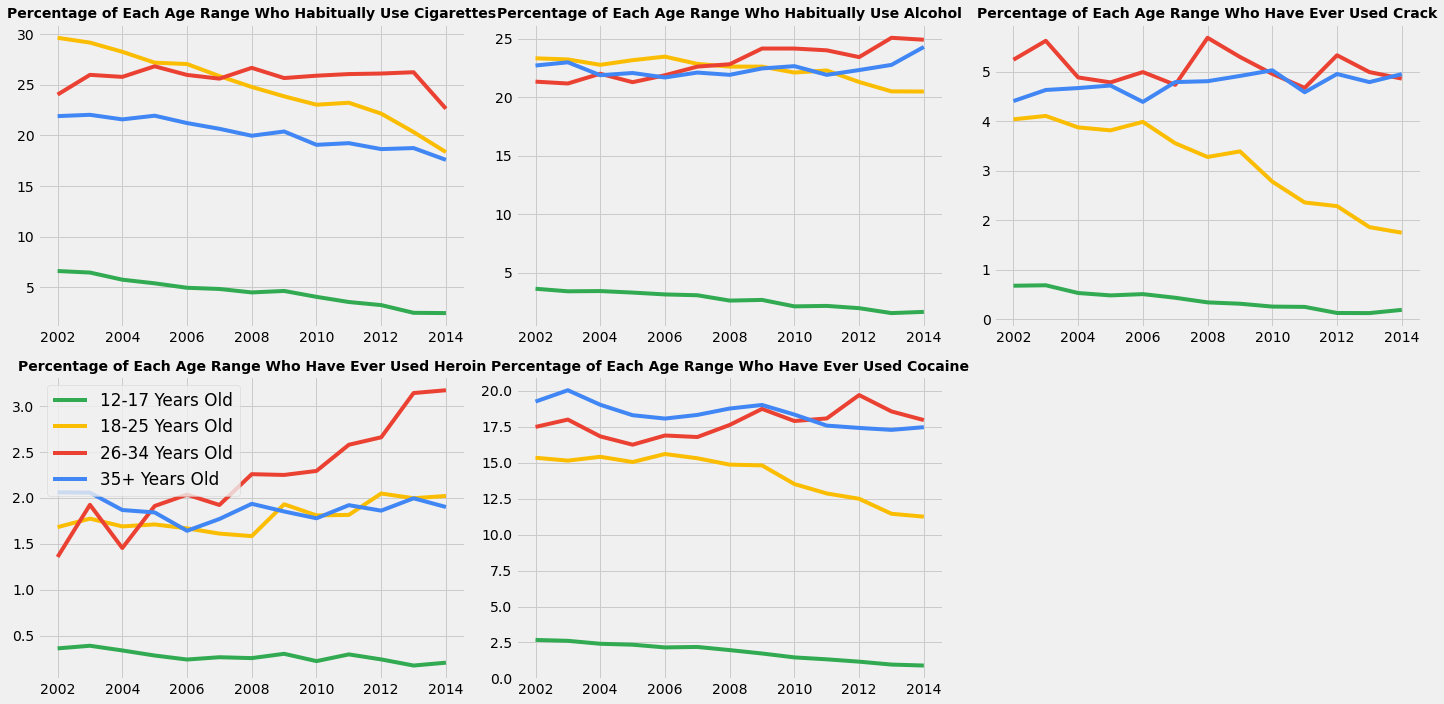

In [406]:
#Percentages per year of habitual cigarette and alcohol users and people who have ever tried crack, cocaine or heroin grouped by age range
fig, axx = plt.subplots(2,3, figsize = (20,10))
plt.style.use('fivethirtyeight')
sns.lineplot(x = percentage_cig_hab_age['year'], y = percentage_cig_hab_age['CIG30USE'], hue = percentage_cig_hab_age['AGE'], palette = age_palette, ax = axx[0,0])
axx[0,0].set_title('Percentage of Each Age Range Who Habitually Use Cigarettes', weight = 'bold', fontsize = 14)
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].get_legend().remove()

sns.lineplot(x = percentage_alc_hab_age['year'], y = percentage_alc_hab_age['ALCDAYS'], hue = percentage_alc_hab_age['AGE'], palette = age_palette, ax = axx[0,1])
axx[0,1].set_title('Percentage of Each Age Range Who Habitually Use Alcohol', weight = 'bold', fontsize = 14)
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].get_legend().remove()

sns.lineplot(x = percentage_crk_trd_age['year'], y = percentage_crk_trd_age['CRKEVER'], hue = percentage_crk_trd_age['AGE'], palette = age_palette, ax = axx[0,2])
axx[0,2].set_title('Percentage of Each Age Range Who Have Ever Used Crack', weight = 'bold', fontsize = 14)
axx[0,2].set(xlabel = '', ylabel = "")
axx[0,2].get_legend().remove()


sns.lineplot(x = percentage_her_trd_age['year'], y = percentage_her_trd_age['HEREVER'], hue = percentage_her_trd_age['AGE'], palette = age_palette, ax = axx[1,0])
axx[1,0].set_title('Percentage of Each Age Range Who Have Ever Used Heroin', weight = 'bold', fontsize = 14)
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].legend(fontsize = 'large')

sns.lineplot(x = percentage_coc_trd_age['year'], y = percentage_coc_trd_age['COCEVER'], hue = percentage_coc_trd_age['AGE'], palette = age_palette, ax = axx[1,1])
axx[1,1].set_title('Percentage of Each Age Range Who Have Ever Used Cocaine', weight = 'bold', fontsize = 14)
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].get_legend().remove()


fig.delaxes(axx[1][2])
plt.tight_layout()

For this analysis it is a bit more interesting to analyze the trends per age group.

### 12-17 years old

- Drug use among this age group has been on the decline for all drugs across the board.

### 18-25 years old

- Cigarettes and crack have become less popular among this group from 2002 to 2014. Cocaine and alcohol are included in this assessment while the percentages have dipped more slowly. The only drug to gain popularity in this age group is heroin.

### 26-34 years old

- Alcohol and cocaine have gained slight popularity among this age group from 2002 to 2014. Heroin has gained drastic popularity, doubling the percentage of people who are experimenting with it from 2002 to 2014. Cigarettes and crack have not changed much except for some minor fluctuations.

### 35+ years old

- 35+ years old participants have more or less stayed constant with slight decreases in cocaine and cigarette use.


Next we move on to analyzing the trends among races.

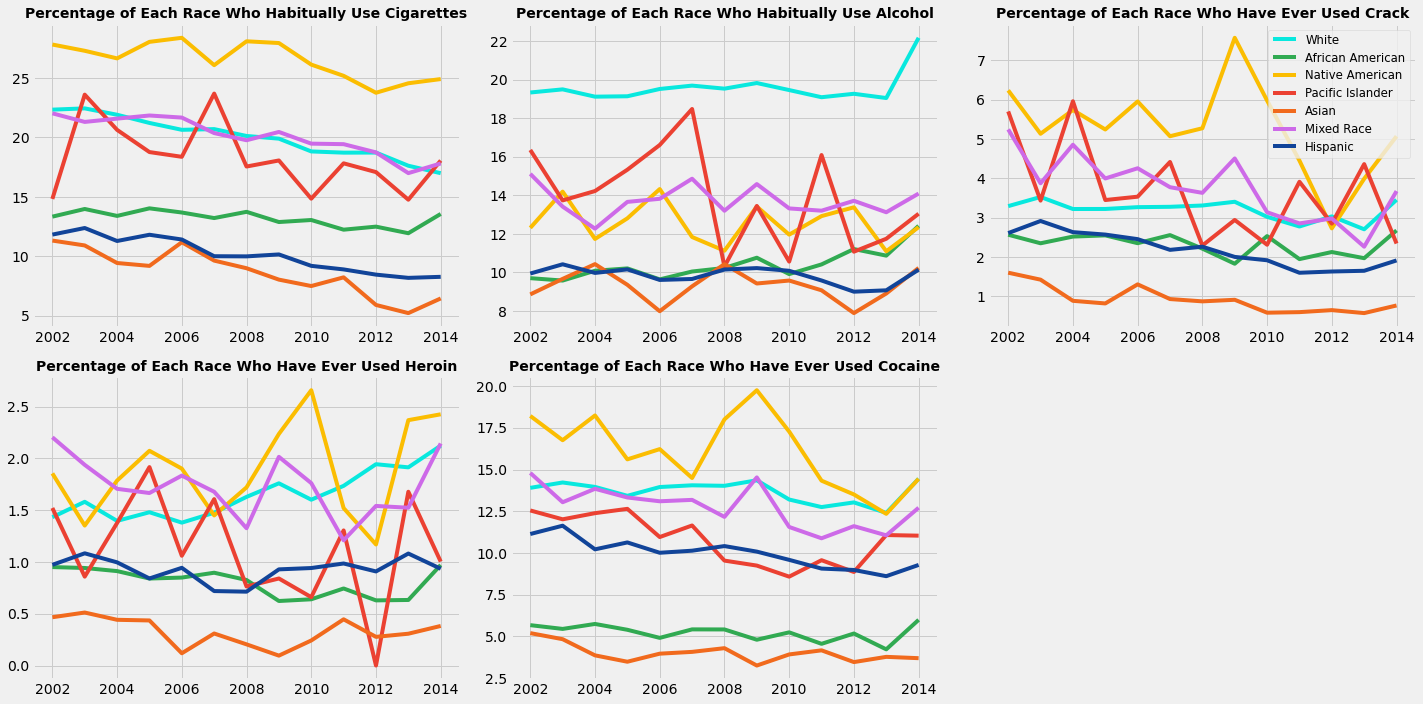

In [407]:
#Percentages per year of habitual cigarette and alcohol users and people who have ever tried crack, cocaine or heroin grouped by race
fig, axx = plt.subplots(2,3, figsize = (20,10))
line_race = ['#08e8de','#31aa52','#fbbd01','#eb4132','#f16a1d','#cd6ae8','#114499']
plt.style.use('fivethirtyeight')
sns.lineplot(x = percentage_cig_hab_race['year'], y = percentage_cig_hab_race['CIG30USE'], hue = percentage_cig_hab_race['NEWRACE3'], palette = line_race, ax = axx[0,0], hue_order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'])
axx[0,0].set_title('Percentage of Each Race Who Habitually Use Cigarettes', weight = 'bold', fontsize = 14)
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].get_legend().remove()

sns.lineplot(x = percentage_alc_hab_race['year'], y = percentage_alc_hab_race['ALCDAYS'], hue = percentage_alc_hab_race['NEWRACE3'], palette = line_race, ax = axx[0,1], hue_order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'])
axx[0,1].set_title('Percentage of Each Race Who Habitually Use Alcohol', weight = 'bold', fontsize = 14)
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].get_legend().remove()

sns.lineplot(x = percentage_crk_trd_race['year'], y = percentage_crk_trd_race['CRKEVER'], hue = percentage_crk_trd_race['NEWRACE3'], palette = line_race, ax = axx[0,2], hue_order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'])
axx[0,2].set_title('Percentage of Each Race Who Have Ever Used Crack', weight = 'bold', fontsize = 14)
axx[0,2].set(xlabel = '', ylabel = "")
axx[0,2].legend(fontsize = 'small')

sns.lineplot(x = percentage_her_trd_race['year'], y = percentage_her_trd_race['HEREVER'], hue = percentage_her_trd_race['NEWRACE3'], palette = line_race, ax = axx[1,0], hue_order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'])
axx[1,0].set_title('Percentage of Each Race Who Have Ever Used Heroin', weight = 'bold', fontsize = 14)
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].get_legend().remove()

sns.lineplot(x = percentage_coc_trd_race['year'], y = percentage_coc_trd_race['COCEVER'], hue = percentage_coc_trd_race['NEWRACE3'], palette = line_race, ax = axx[1,1], hue_order = ['White', 'African American', 'Native American', 'Pacific Islander', 'Asian', 'Mixed Race', 'Hispanic'])
axx[1,1].set_title('Percentage of Each Race Who Have Ever Used Cocaine', weight = 'bold', fontsize = 14)
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].get_legend().remove()


fig.delaxes(axx[1][2])
plt.tight_layout()



Some of the races have extreme fluctuations and this is due to the number of reported participants. We had to add an extra row to the heroin lineplot dataframe because no Pacific Islanders reported as having tried heroin in 2012. Looking at the plots, you can see that the plots that are more stable have more participants in their respective group. Therefore it's hard to gain any real insights from at least three of the groups due to low number of participants in their groups. Regardless we will try to identify some trends.

#### Cigarettes
- For all races percentages of habitual cigarette smokers have declined or at least remained the same.

#### Alcohol
- Percentages of white people being habitual alcohol drinkers has stayed above the other races over the years. Despite the fluctuations of some of the lines, which we can attribute to low participation numbers, the percentage of habitual alcohol drinkers has stayed the same for all races from 2002 to 2013. Then we a slight spike in all races for 2014.

#### Crack
- Crack use has declined or stayed the same across all races . Again we see spikes in 2014.

#### Heroin
- Reported heroin numbers are much too low to see any real trends at least for Native Americans, Pacific Islanders and Mixed Race. Heroin use has been on the rise for white people. It was on the decline for African Americans until 2014 with an increase. Hispanic use has more or less stayed the same.

#### Cocaine
- Cocaine use has been on the decline for hispanics and African Americans until 2014, where again there's an increase, much more drastic for African Americans. The increase in 2014 expands to white and Native American people.

Overall the trends we see are that Asian drug use is less than all other races in all categories. We saw a lot of fluctuations for Native Americans, Mixed Race and Pacific Islanders due to low numbers. We also recognized several sudden increases in 2014 across all drugs except for cigarettes.

## Education Groups Over Time

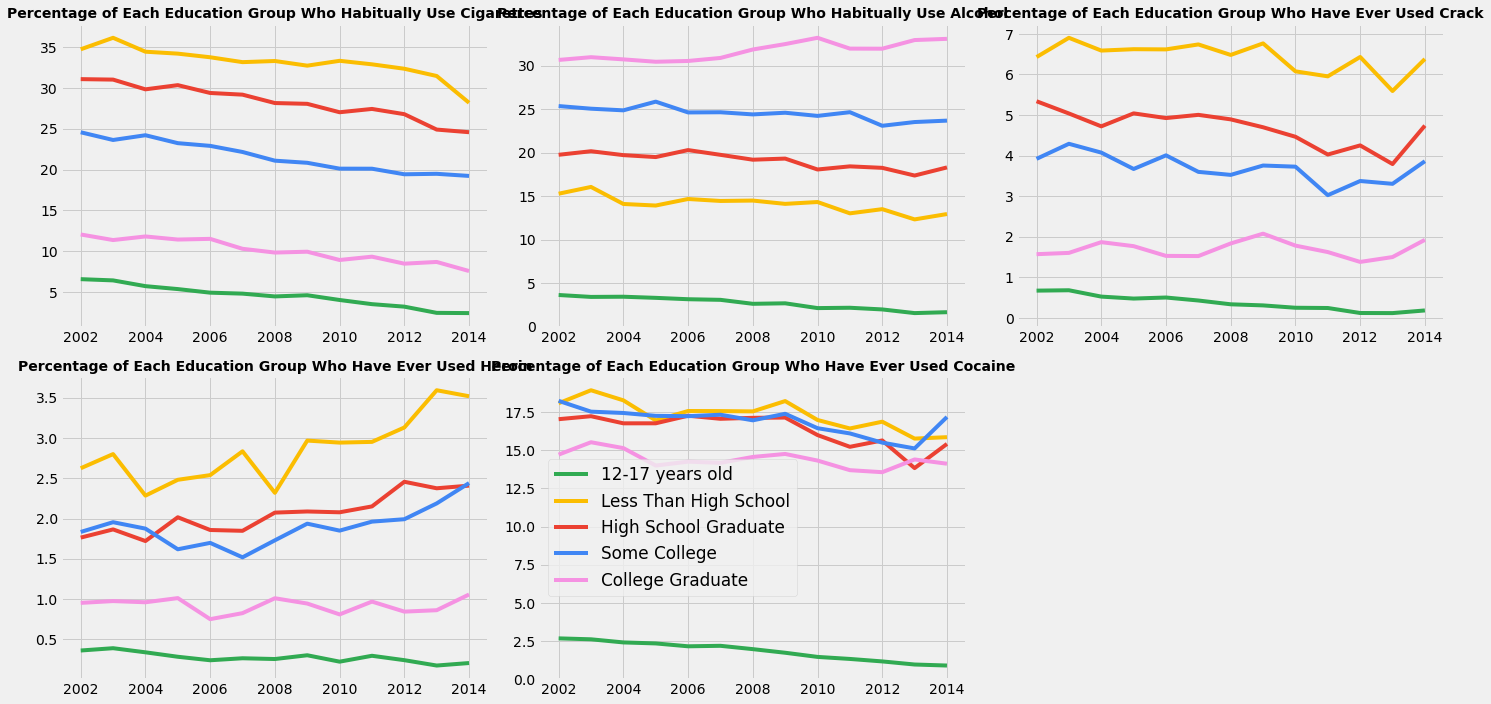

In [408]:
#Percentages per year of habitual cigarette and alcohol users and people who have ever tried crack, cocaine or heroin grouped by education group
fig, axx = plt.subplots(2,3, figsize = (20,10))
edu_palette = ['#31aa52', '#fbbd01', '#eb4132','#4086f4', '#f592e2']
plt.style.use('fivethirtyeight')
sns.lineplot(x = percentage_cig_hab_edu['year'], y = percentage_cig_hab_edu['CIG30USE'], hue = percentage_cig_hab_edu['EDUCATION'], palette = edu_palette, ax = axx[0,0], hue_order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[0,0].set_title('Percentage of Each Education Group Who Habitually Use Cigarettes', weight = 'bold', fontsize = 14)
axx[0,0].set(xlabel = '', ylabel = "")
axx[0,0].get_legend().remove()

sns.lineplot(x = percentage_alc_hab_edu['year'], y = percentage_alc_hab_edu['ALCDAYS'], hue = percentage_alc_hab_edu['EDUCATION'], palette = edu_palette, ax = axx[0,1], hue_order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[0,1].set_title('Percentage of Each Education Group Who Habitually Use Alcohol', weight = 'bold', fontsize = 14)
axx[0,1].set(xlabel = '', ylabel = "")
axx[0,1].get_legend().remove()

sns.lineplot(x = percentage_crk_trd_edu['year'], y = percentage_crk_trd_edu['CRKEVER'], hue = percentage_crk_trd_edu['EDUCATION'], palette = edu_palette, ax = axx[0,2], hue_order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[0,2].set_title('Percentage of Each Education Group Who Have Ever Used Crack', weight = 'bold', fontsize = 14)
axx[0,2].set(xlabel = '', ylabel = "")
axx[0,2].get_legend().remove()

sns.lineplot(x = percentage_her_trd_edu['year'], y = percentage_her_trd_edu['HEREVER'], hue = percentage_her_trd_edu['EDUCATION'], palette = edu_palette, ax = axx[1,0], hue_order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[1,0].set_title('Percentage of Each Education Group Who Have Ever Used Heroin', weight = 'bold', fontsize = 14)
axx[1,0].set(xlabel = '', ylabel = "")
axx[1,0].get_legend().remove()

sns.lineplot(x = percentage_coc_trd_edu['year'], y = percentage_coc_trd_edu['COCEVER'], hue = percentage_coc_trd_edu['EDUCATION'], palette = edu_palette, ax = axx[1,1], hue_order = ['12-17 years old','Less Than High School', 'High School Graduate', 'Some College', 'College Graduate'])
axx[1,1].set_title('Percentage of Each Education Group Who Have Ever Used Cocaine', weight = 'bold', fontsize = 14)
axx[1,1].set(xlabel = '', ylabel = "")
axx[1,1].legend(fontsize = 'large')

fig.delaxes(axx[1][2])
plt.tight_layout()

Unlike the race and age groups, we see a clear divide among the different education groups for all drugs except cocaine. We will divide this analysis into drug groups because we see many of the same trends across the different groups.

#### Cigarettes
- Cigarettes have been steadily declining in habitual use across all education groups. 

#### Alcohol
- Alcohol use has not fluctuated much in the last 13 years. The only education group where we see habitual alcohol use increasing is for college graduates.

#### Crack
- There are minor fluctuations across all groups but more or less percentages have stayed the same. Again we see increases across all education groups in 2014.

#### Heroin
- Heroin use seems to be gaining in popularity among all education groups except 12-17 year olds. The increase in popularity was more rapid, the less education the participants had.

#### Cocaine
- Cocaine actually seems to be on the decline in popularity among the less than high school and 12-17 year olds groups. Otherwise with minor fluctuations the percentages have stayed the same. 

Now that we have seen all the trends for individual groups, it would be interesting to know the trends for habitual cigarette and alchol users and participants who have tried crack, cocaine or heroin overall. We want to know if in the overall survey from 2002-2014 if the use is going down or up as see that in one graphic.

## Overall Drug Trends

In [409]:
#Function to give percentages of users, per group over time without a filter into different groups
def percentage_overall_filter(user_df, all_df, column):
    year_all = all_df.groupby('year')
    count_all = year_all[column].count()
    count_all_df = pd.DataFrame(count_all)
    count_all_df.reset_index(inplace = True)
    
    
    year_user = user_df.groupby('year')
    count_user = year_user[column].count()
    count_user_df = pd.DataFrame(count_user)
    count_user_df.reset_index(inplace=True)
    count_user_df[column] = (count_user_df[column]/count_all_df[column])*100
    return count_user_df

In [410]:
# Overall percentages of habitual cigarette and alcohol users and participants who have ever tried crack, cocaine or heroin dataframes
cig_hab_overall = percentage_overall_filter(cig_hab, drugs, 'CIG30USE')
alc_hab_overall = percentage_overall_filter(alc_hab, drugs, 'ALCDAYS')
crk_trd_overall = percentage_overall_filter(crk_trd, drugs, 'CRKEVER')
her_trd_overall = percentage_overall_filter(her_trd, drugs, 'HEREVER')
coc_trd_overall = percentage_overall_filter(coc_trd, drugs, 'COCEVER')

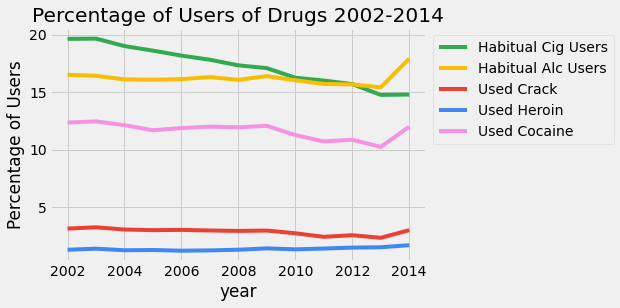

In [411]:
#Line plots of overall percentages of habitual cigarette and alcohol users and participants who have ever tried crack, cocaine or heroin
fig, ax = plt.subplots()
sns.lineplot(x = cig_hab_overall['year'],  y = cig_hab_overall['CIG30USE'], color = '#31aa52')
sns.lineplot(x = alc_hab_overall['year'],  y = alc_hab_overall['ALCDAYS'], color = '#fbbd01' )
sns.lineplot(x = crk_trd_overall['year'],  y = crk_trd_overall['CRKEVER'], color = '#eb4132')
sns.lineplot(x = her_trd_overall['year'],  y = her_trd_overall['HEREVER'], color = '#4086f4')
sns.lineplot(x = coc_trd_overall['year'],  y = coc_trd_overall['COCEVER'], color = '#f592e2')
ax.set_ylabel('Percentage of Users')
ax.set_title('Percentage of Users of Drugs 2002-2014')
plt.legend(labels= ['Habitual Cig Users', 'Habitual Alc Users', 'Used Crack', 'Used Heroin', 'Used Cocaine'], bbox_to_anchor = (1,1))


We can see that habitual cigarette use has changed the most, steadily declining over the 13 years. All other drugs were seeing slight declines until 2014 where all progress towards lower drug consumption was wiped away.

# Correlation Matrices

Now that we have analyzed the different distributions, percentages and trends of our different categories, we are one step closer to building a user profile for each drug. While at this point we could certainly combine our findings and create a profile for a user, we want to see if there are any correlations strong enough to suggest that we could make predictions with our findings. To find this out, we will create correlation matrices and look for numbers that are highly correlated.

To do that we need to code our columns in such a way that it makes it easy for  to decipher the correlation matrix function, the difference between a value for a non-habitual smoker and a habitual smoker for example. Below, I've created individual columns that mark a person as a habitual user as 1 and a non-habitual users as 0 for alcohol and cigarettes. I've done the same to mark individuals that have tried crack, cocaine or heroin and individuals that haven't.

In [412]:
#Creating function to code habitual cigarette users
def habitual_cig_user(value):
    if value < 15:
        return 0
    if math.isnan(value):
        return 0
    if value > 30:
        return 0
    else: return 1


# Creating column for habitual cigarette users
drugs['habitual_cig_user'] = drugs['CIG30USE'].apply(habitual_cig_user)
print(drugs['habitual_cig_user'].value_counts())
print('\n')
# Verifying correct coding
print(drugs[['CIG30USE', 'habitual_cig_user']].head(20))

0    598253
1    125030
Name: habitual_cig_user, dtype: int64


    CIG30USE  habitual_cig_user
0        3.0                  0
1       91.0                  0
2       91.0                  0
3       91.0                  0
4       91.0                  0
5       91.0                  0
6       93.0                  0
7       91.0                  0
8       91.0                  0
9       29.0                  1
10      93.0                  0
11      91.0                  0
12      30.0                  1
13      30.0                  1
14      93.0                  0
15      25.0                  1
16      93.0                  0
17      91.0                  0
18      91.0                  0
19      30.0                  1


In [413]:
#Creating function to code habitual alcohol users
def habitual_alc_user(value):
    if value < 7:
        return 0
    if math.isnan(value):
        return 0
    if value > 30:
        return 0
    else: return 1

# Creating column for habitual alchol users
drugs['habitual_alc_user'] = drugs['ALCDAYS'].apply(habitual_alc_user)
print(drugs['habitual_alc_user'].value_counts())
print('\n')
#Verifying that the new column has been coded properly
print(drugs[['ALCDAYS', 'habitual_alc_user']].head(20))

0    606030
1    117253
Name: habitual_alc_user, dtype: int64


    ALCDAYS  habitual_alc_user
0      91.0                  0
1      91.0                  0
2      12.0                  1
3      93.0                  0
4      91.0                  0
5      91.0                  0
6       3.0                  0
7      91.0                  0
8      93.0                  0
9      93.0                  0
10      2.0                  0
11     91.0                  0
12      2.0                  0
13     93.0                  0
14      8.0                  1
15      6.0                  0
16      3.0                  0
17     93.0                  0
18     91.0                  0
19      3.0                  0


In [414]:
#Creating function to code participants that have ever tried cocaine
def tried_cocaine(value):
    if value == 1:
        return 1
    else: return 0

# Creating column for participants who have ever tried cocaine
drugs['tried_cocaine'] = drugs['COCEVER'].apply(tried_cocaine)
print(drugs['tried_cocaine'].value_counts())
print('\n')
#Verifying that the new column has been coded properly
print(drugs[['COCEVER', 'tried_cocaine']].head(50))

0    638950
1     84333
Name: tried_cocaine, dtype: int64


    COCEVER  tried_cocaine
0       2.0              0
1       2.0              0
2       2.0              0
3       2.0              0
4       2.0              0
5       2.0              0
6       1.0              1
7       2.0              0
8       2.0              0
9       1.0              1
10      2.0              0
11      2.0              0
12      1.0              1
13      2.0              0
14      2.0              0
15      2.0              0
16      2.0              0
17      2.0              0
18      2.0              0
19      2.0              0
20      2.0              0
21      2.0              0
22      1.0              1
23      2.0              0
24      2.0              0
25      2.0              0
26      2.0              0
27      2.0              0
28      2.0              0
29      2.0              0
30      2.0              0
31      2.0              0
32      2.0              0
33      1.0           

In [415]:
#Creating function to code participants that have ever tried heroin
def tried_heroin(value):
    if value == 2:
        return 0
    if value == 1:
        return 1
    else: return 0

# Creating column for participants who have ever tried cocaine
drugs['tried_heroin'] = drugs['HEREVER'].apply(tried_heroin)
print(drugs['tried_heroin'].value_counts())
print('\n')
#Verifying that the new column has been coded properly
print(drugs[['HEREVER', 'tried_heroin']].head(50))

0    713301
1      9982
Name: tried_heroin, dtype: int64


    HEREVER  tried_heroin
0       2.0             0
1       2.0             0
2       2.0             0
3       2.0             0
4       2.0             0
5       2.0             0
6       2.0             0
7       2.0             0
8       2.0             0
9       2.0             0
10      2.0             0
11      2.0             0
12      2.0             0
13      2.0             0
14      2.0             0
15      2.0             0
16      2.0             0
17      2.0             0
18      2.0             0
19      2.0             0
20      2.0             0
21      2.0             0
22      2.0             0
23      2.0             0
24      2.0             0
25      2.0             0
26      2.0             0
27      2.0             0
28      2.0             0
29      2.0             0
30      2.0             0
31      2.0             0
32      2.0             0
33      2.0             0
34      2.0             0
35   

In [416]:
#Creating function to code participants that have ever tried crack
def tried_crack(value):
    if value == 91:
        return 0
    if value == 2:
        return 0
    if value == 1:
        return 1
    else: return 0

# Creating column for participants who have ever tried cocaine
drugs['tried_crack'] = drugs['CRKEVER'].apply(tried_crack)
print(drugs['tried_crack'].value_counts())
print('\n')
#Verifying that the new column has been coded properly
print(drugs[['CRKEVER', 'tried_crack']].head(50))

0    702436
1     20847
Name: tried_crack, dtype: int64


    CRKEVER  tried_crack
0      91.0            0
1      91.0            0
2      91.0            0
3      91.0            0
4      91.0            0
5      91.0            0
6       2.0            0
7      91.0            0
8      91.0            0
9       2.0            0
10     91.0            0
11     91.0            0
12      2.0            0
13     91.0            0
14     91.0            0
15     91.0            0
16     91.0            0
17     91.0            0
18     91.0            0
19     91.0            0
20     91.0            0
21     91.0            0
22      2.0            0
23     91.0            0
24     91.0            0
25     91.0            0
26     91.0            0
27     91.0            0
28     91.0            0
29     91.0            0
30     91.0            0
31     91.0            0
32     91.0            0
33      2.0            0
34     91.0            0
35     91.0            0
36     91.0      

I've imported a package, dython, that can generate correlation matrices with categorical variables. Below you will see five correlation matrices for the different drugs and the columns that might have correlations with each other. 

### Cigarette Correlation Matrix

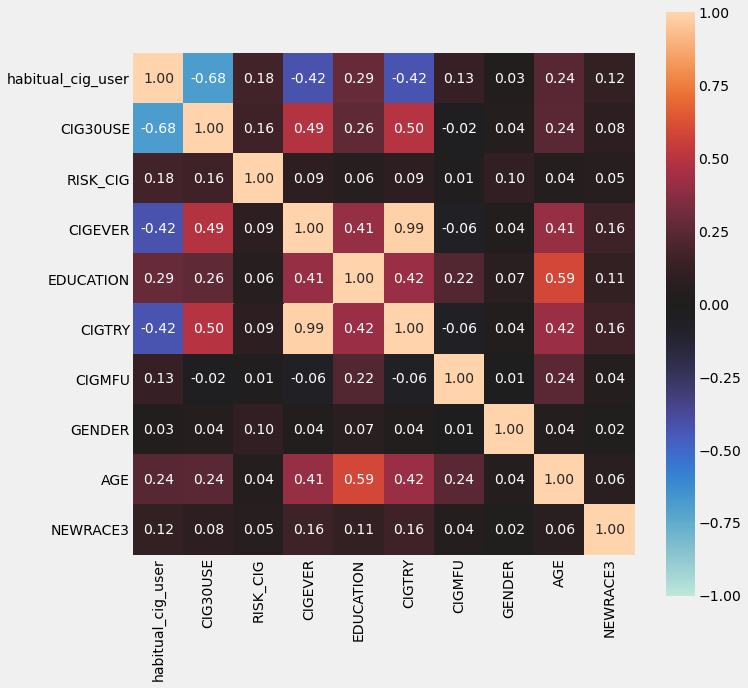

In [417]:
cig_drugs_corr = associations(drugs.loc[:,['habitual_cig_user', 'CIG30USE', 'RISK_CIG', 'CIGEVER','EDUCATION', 'CIGTRY','CIGMFU','GENDER','AGE', 'NEWRACE3']], figsize=(10,10))

In the correlation matrix above we don't see any of our different filters, gender, age, race, education or risk as having a strong correlation with whether or not someone is a habitual cigarette user. The strongest correlation which would be considered as a weak correlation is education. This makes sense since we saw clear divides among the users over time. We also expect that there would be stronger correlations with columns like CIGTRY, CIGEVER and CIG30USE mainly because these columns denote use or non-use of cigarettes.

### Alcohol Correlation Matrix

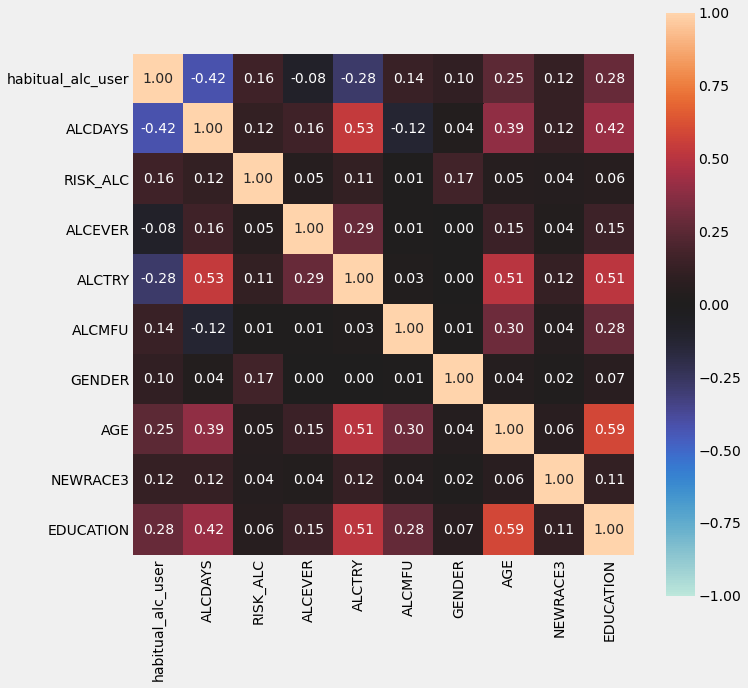

In [418]:
alc_drugs_corr = associations(drugs.loc[:,['habitual_alc_user', 'ALCDAYS', 'RISK_ALC', 'ALCEVER', 'ALCTRY','ALCMFU','GENDER','AGE', 'NEWRACE3',  'EDUCATION']], figsize = (10,10))

Above we see a couple of weak correlations with habitual alcohol users in terms of age and education. Other than that we see what we would expect to see from the columns that denote alchol use.

### Crack Correlation Matrix

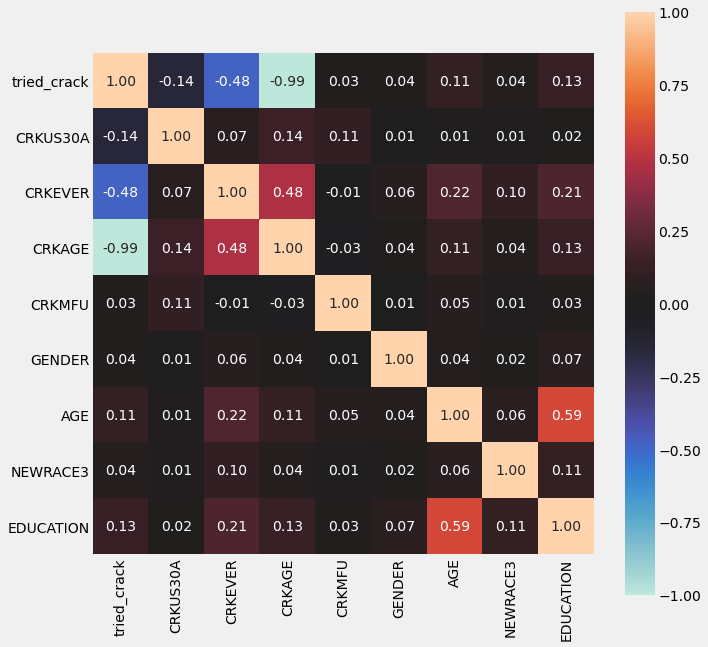

In [419]:
crk_drugs_corr = associations(drugs.loc[:,['tried_crack', 'CRKUS30A', 'CRKEVER', 'CRKAGE','CRKMFU','GENDER','AGE', 'NEWRACE3', 'EDUCATION']], figsize = (10,10))

Above we see even weaker correlations than we did with habitual users of cigarettes and alcohol.

### Heroin Correlation Matrix

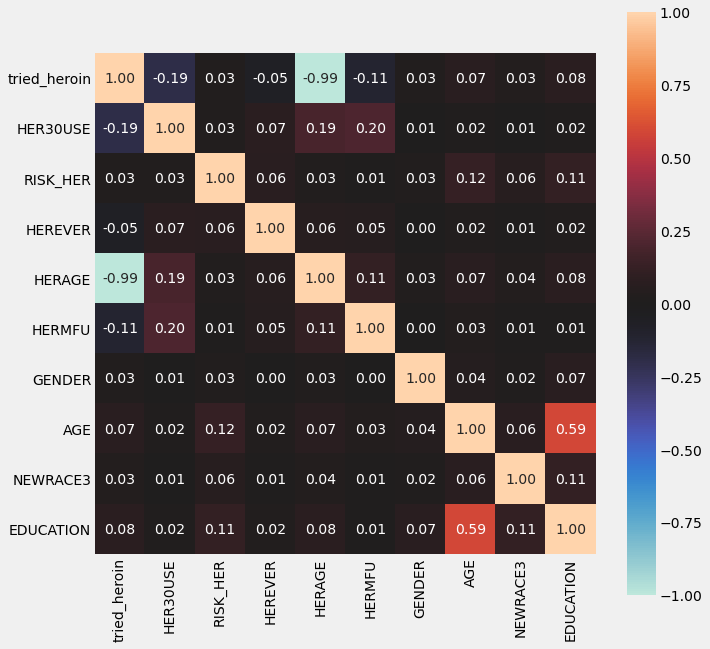

In [420]:
her_drugs_corr = associations(drugs.loc[:,['tried_heroin', 'HER30USE', 'RISK_HER', 'HEREVER', 'HERAGE','HERMFU','GENDER','AGE', 'NEWRACE3', 'EDUCATION']], figsize = (10,10))

Above we see a similar correlation matrix as we did with crack in that our filters have very little correlation with whether someone will try crack or not.

### Cocaine Correlation Matrix

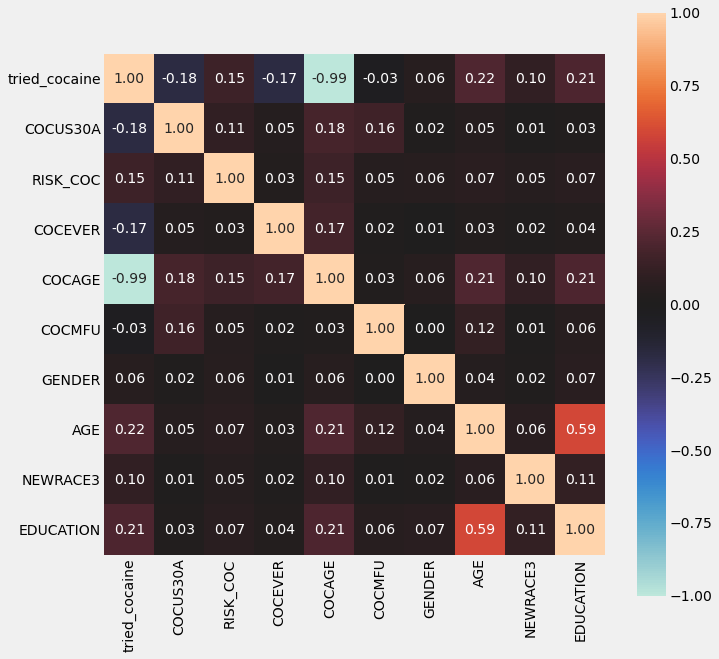

In [421]:
coc_drugs_corr = associations(drugs.loc[:,['tried_cocaine', 'COCUS30A', 'RISK_COC', 'COCEVER', 'COCAGE','COCMFU','GENDER','AGE', 'NEWRACE3',  'EDUCATION']], figsize = (10,10))

As we can see, due to the higher amount of users of cocaine, the correlation matrix coefficients are a bit higher. This has to do with there being more data on confirmed users to be able to make a distinction and correlate the outcomes.

Unfortunately, there's just not enough of a correlation to be able to use the correlation coefficients to do further analysis in this way. 

# Conclusion

Can we create a profile of a typical habitual user of cigarettes or alcohol or the profile of someone who experiments with crack, cocaine or heroin. The answer is most likely not. Through our data we've seen that habitual drug users and drug experimenters come from all different backgrounds. What we can do is provide the profile of someone who is more likely than others to be at risk of habitually using alcohol or cigarettes or trying crack, cocaine or heroin. Due to the fact that people generally spend time with people in their same age range, often same gender, same education level, etc. there could be more exposure to drugs that their peers are doing. Here is what the data shows.

- Cigarettes
A man who is aged 26-34 years old, has less than a high school education and assesses that habitual cigarette use is a great risk to their health, would fit the model of the most likely person to be at risk of being a habitual cigarette user. It should be noted that due to the decline in popularity of cigarettes, this user profile is less likely to become a habitual cigarette user than in the past.

- Alcohol
A white man, 18 years or older who is a college graduate and assesses that habitual alcohol use is a great risk to their health, would fit the model of the most likely person at risk to be a habitual alcohol user.

- Crack
A man, 26 years or older who has less than a high school education and assesses that habitual crack use is a great risk to their health, would fit the model of the most likely person to be at risk to try crack.

- Heroin
A man, 26-34 years old, who has less than a high school education and assesses that habitual heroin use is a great risk to their health, would fit the model of the most likely person to be at risk to try heroin. This user profile is also more likely to try heroin than in the past.

- Cocaine
A man, 26 years or older who has not graduated college and assesses that habitual cocaine use is a great risk to their health, would fit the model of the most likely person to be at risk to try cocaine.

## Actionable Findings

- Based on the findings we could make targeted internet ads for individuals that fit these profiles offering programs for drug rehabilitation, community projects etc.

- We can research current events that happened in 2014, continue the analysis for a few years that followed 2014 to make a hypothesis about the reason for the sudden increase of drug consumption.

- We can also make our research more robust by looking at other studies that assessed other factors that were not assessed in this survey to make our drug profiles more refined.

- Once we have made our research more robust, we can again attempt to build a machine learning model that can predict who will become addicted to drugs and do what we can to put programs in place to prevent drug use.